In [15]:
import pandas as pd
import numpy as np
import ta

In [16]:
df = pd.read_csv(r"D:\business-analytics-project-main\MSFT.csv")

In [17]:
df=df[df.Date>='1995-01-01']

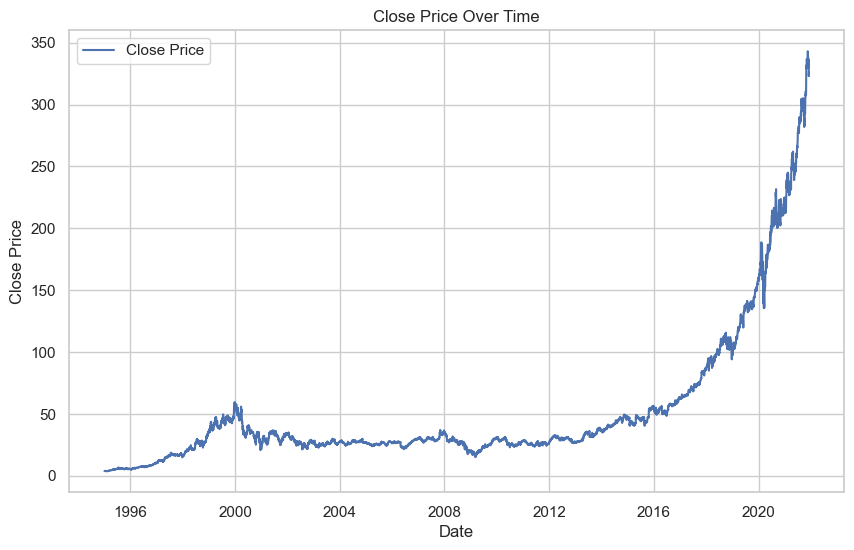

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming your data is stored in a DataFrame named df
# If not, you can load your data using pd.read_csv or another method

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the 'Close' column
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [19]:

df['Price Change'] = df['Close'].diff()

# Count the number of days with positive and negative price changes for each year
for year, group in df.groupby(df.index.year):
    days_increase = group[group['Price Change'] > 0].shape[0]
    days_decrease = group[group['Price Change'] < 0].shape[0]
    print(f"For {year}:")
    print(f"Number of days with price increase: {days_increase}")
    print(f"Number of days with price decrease: {days_decrease}")
    print("\n")


For 1995:
Number of days with price increase: 124
Number of days with price decrease: 123


For 1996:
Number of days with price increase: 130
Number of days with price decrease: 117


For 1997:
Number of days with price increase: 126
Number of days with price decrease: 124


For 1998:
Number of days with price increase: 141
Number of days with price decrease: 110


For 1999:
Number of days with price increase: 123
Number of days with price decrease: 129


For 2000:
Number of days with price increase: 114
Number of days with price decrease: 135


For 2001:
Number of days with price increase: 129
Number of days with price decrease: 118


For 2002:
Number of days with price increase: 117
Number of days with price decrease: 135


For 2003:
Number of days with price increase: 131
Number of days with price decrease: 117


For 2004:
Number of days with price increase: 121
Number of days with price decrease: 124


For 2005:
Number of days with price increase: 115
Number of days with price decr

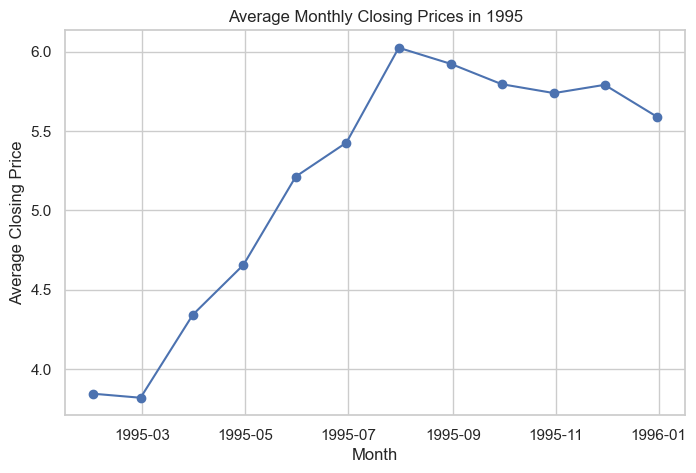

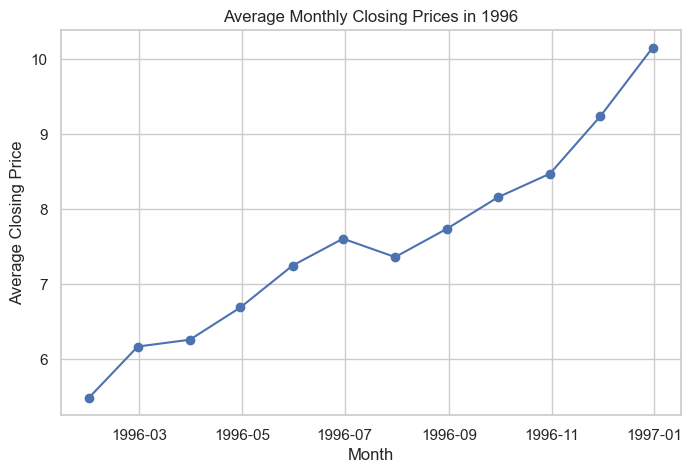

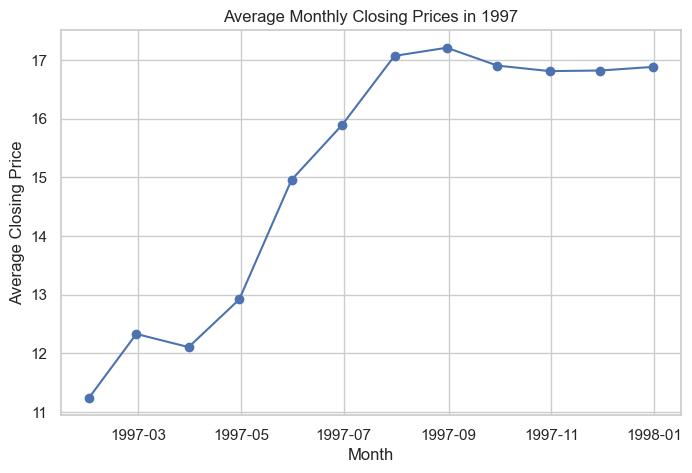

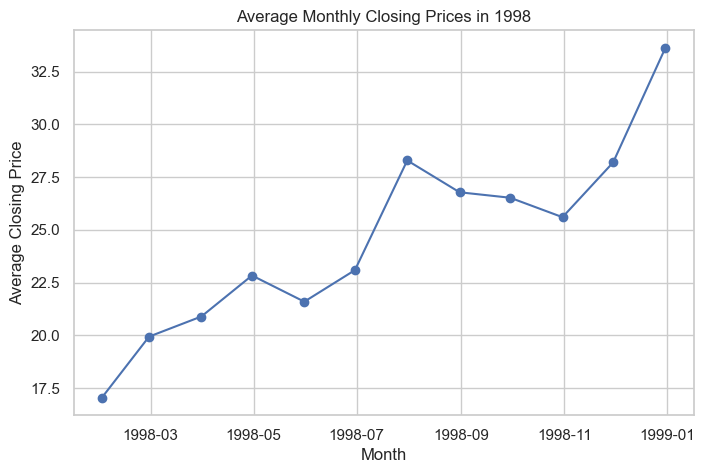

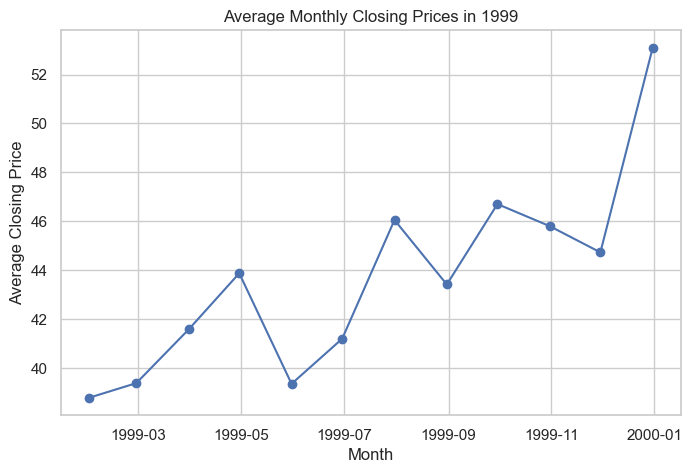

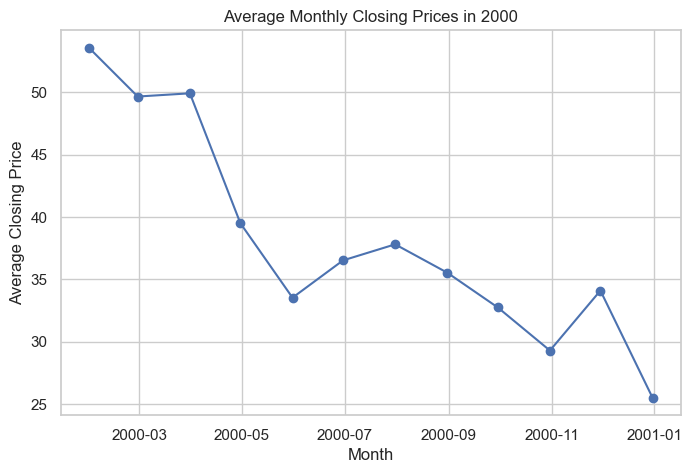

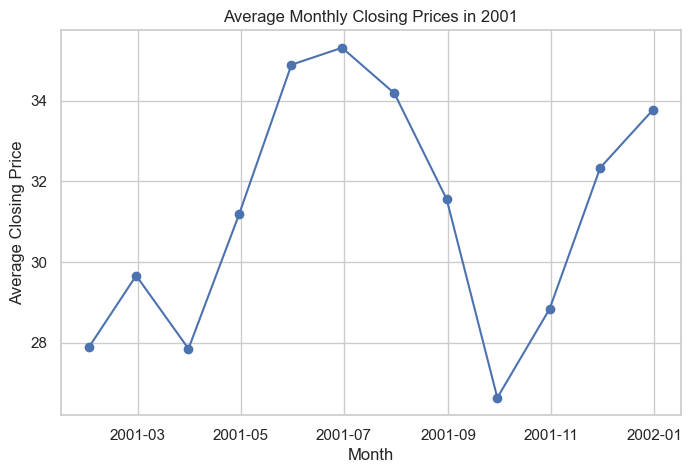

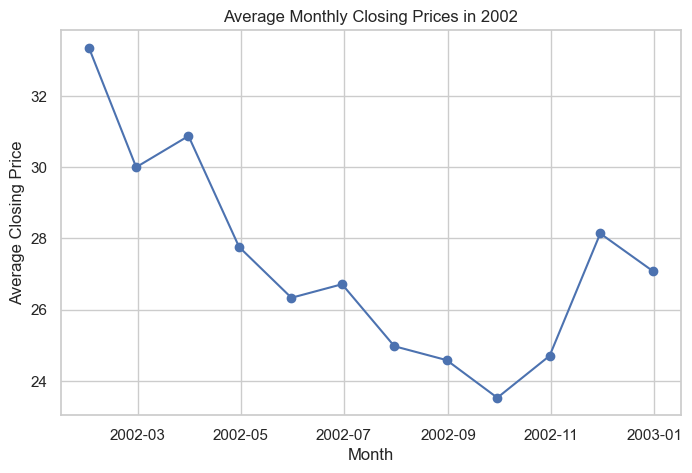

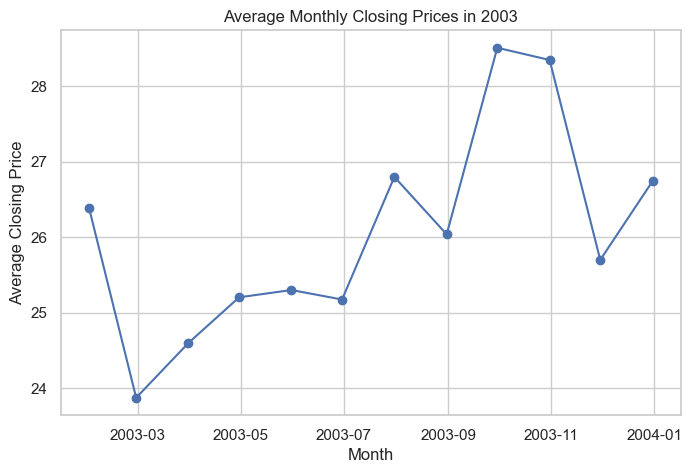

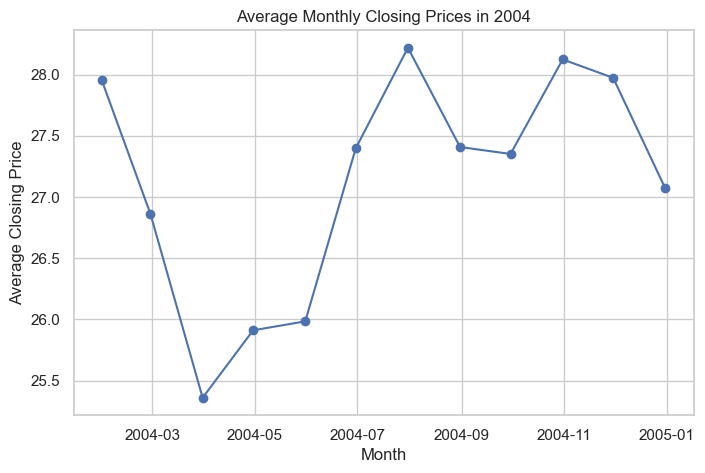

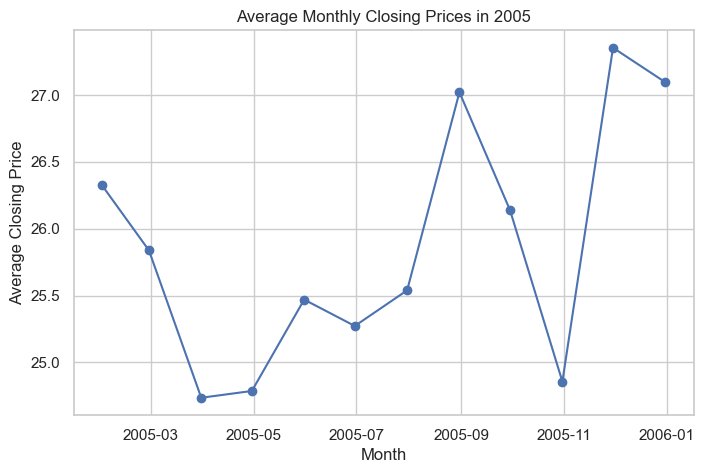

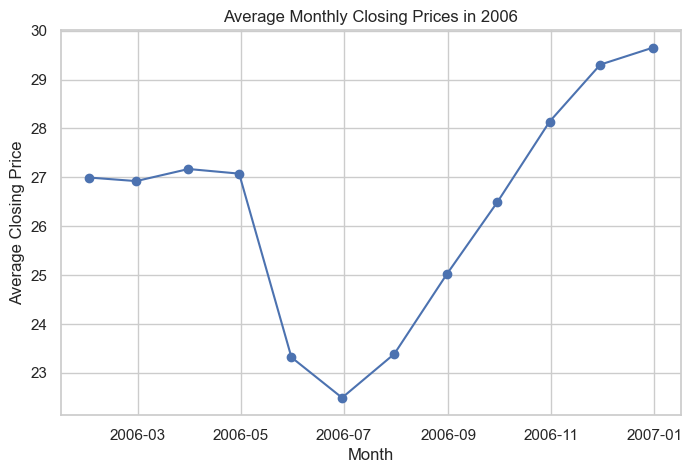

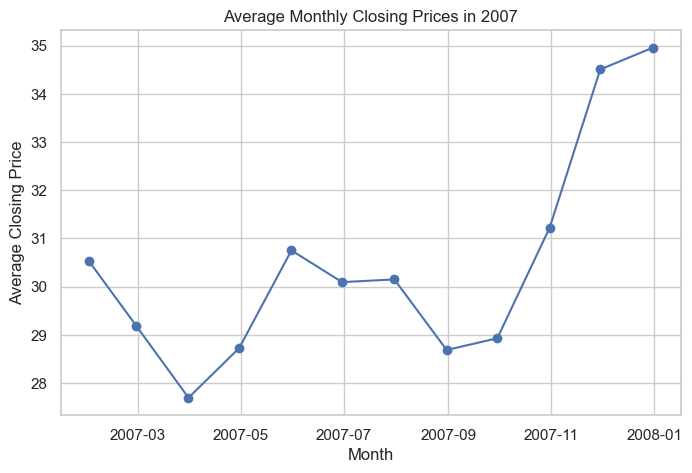

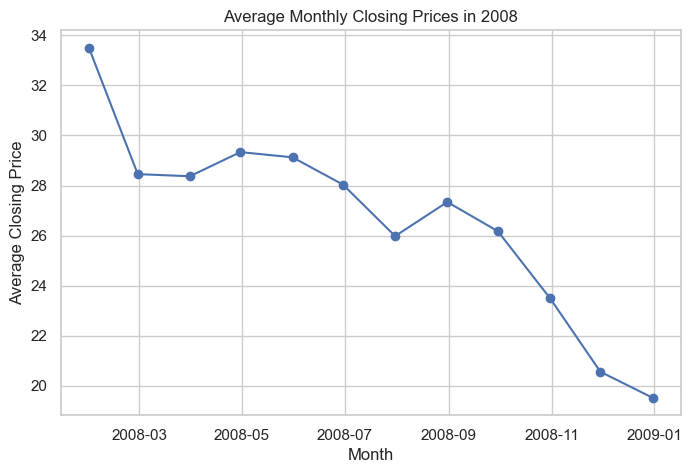

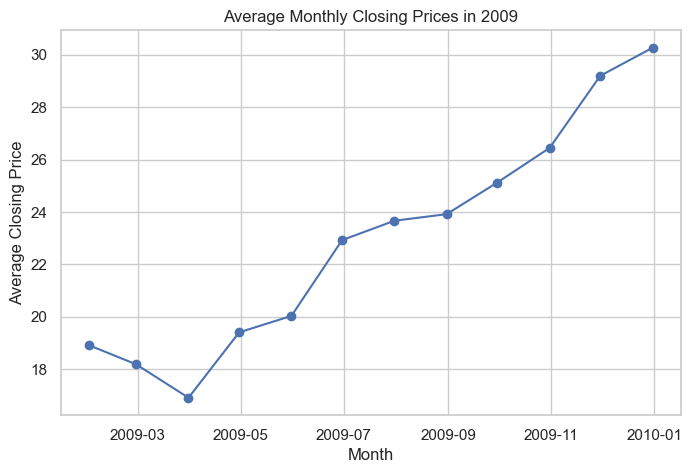

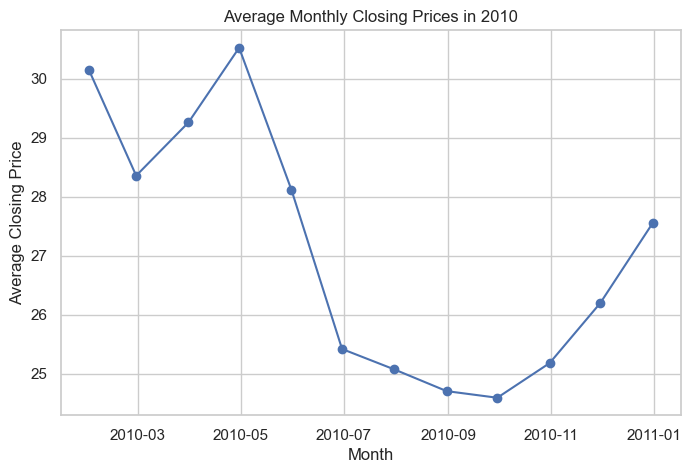

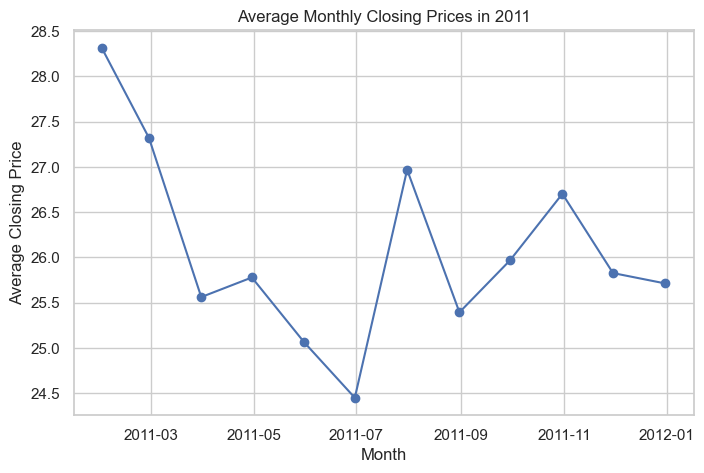

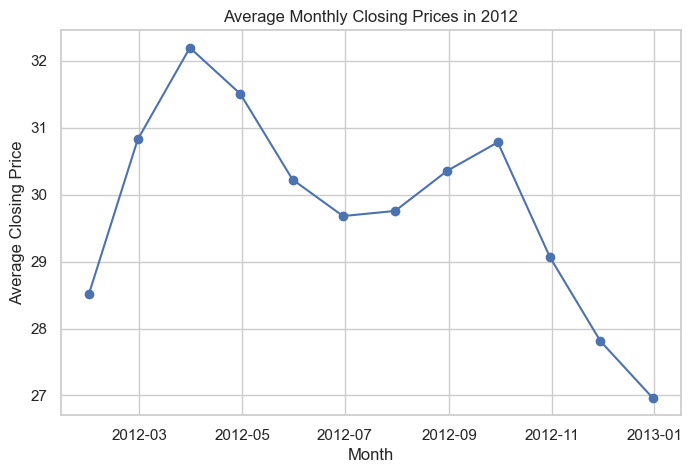

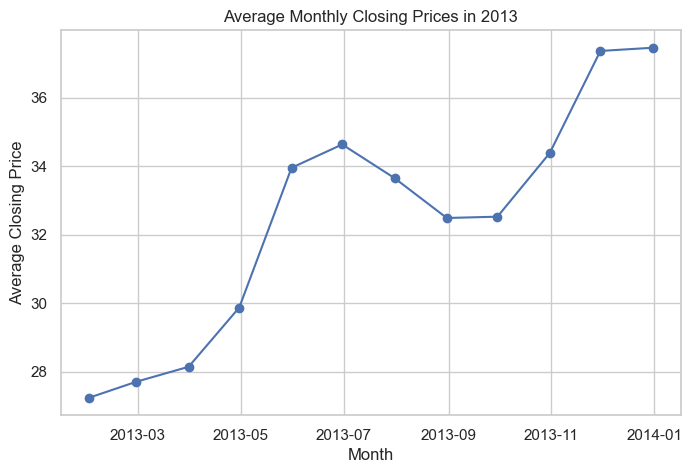

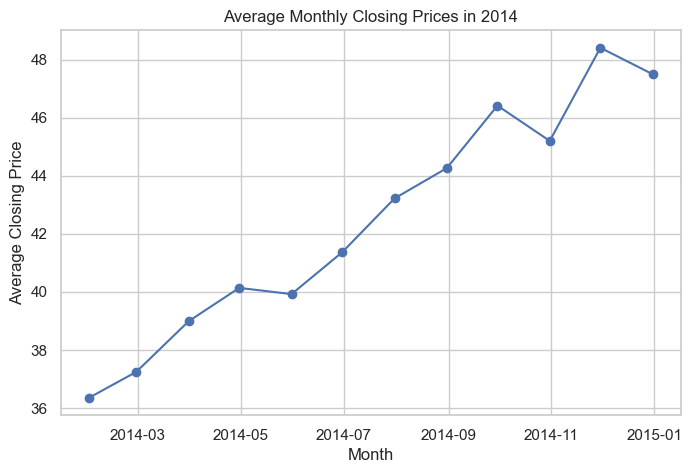

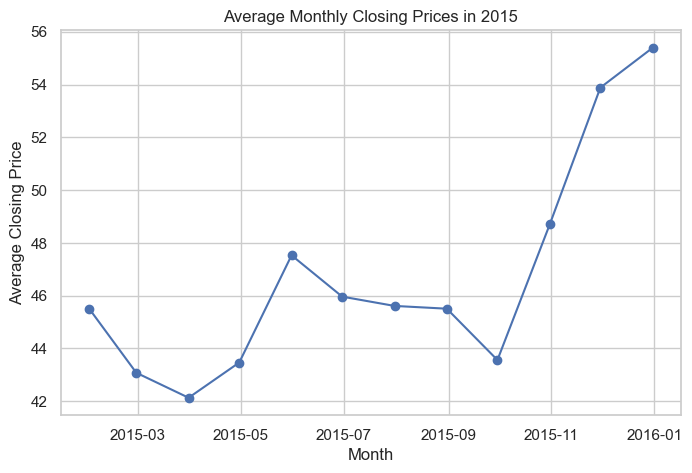

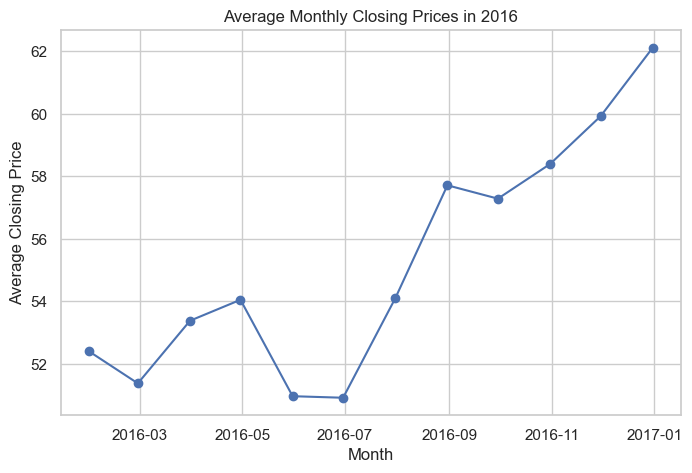

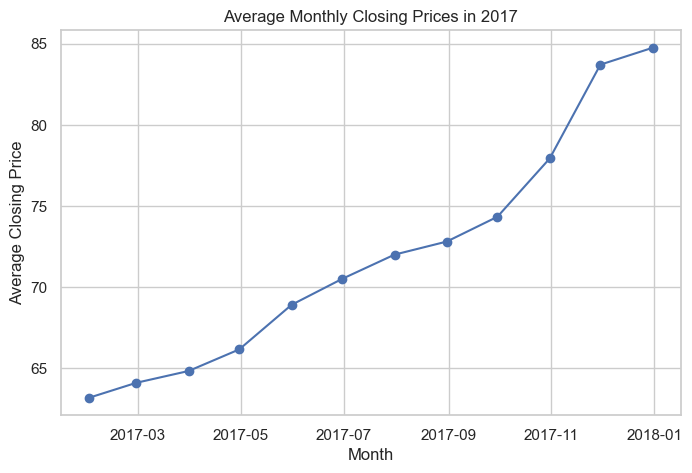

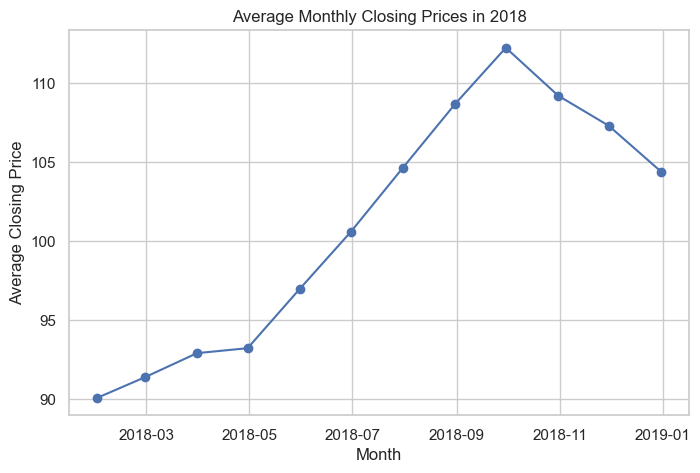

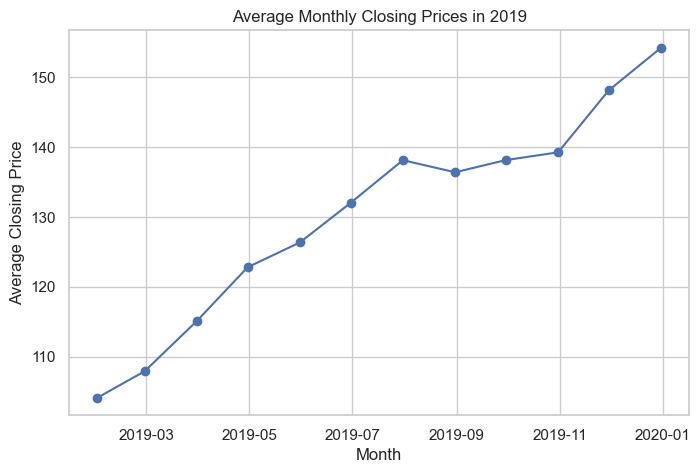

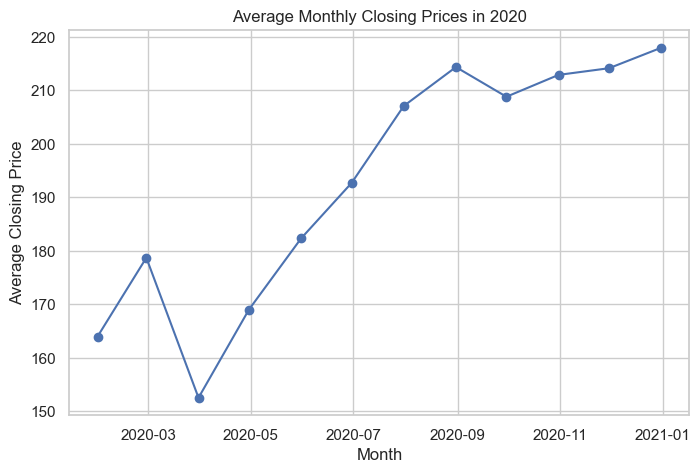

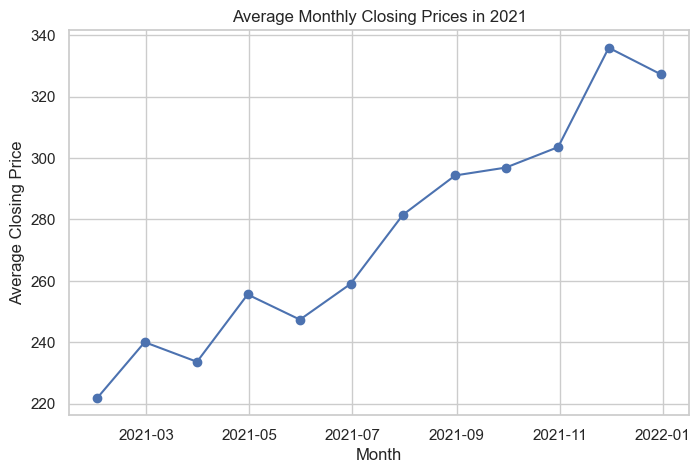

In [20]:

# Group by year and month, then calculate average closing prices
for year, group in df.groupby(df.index.year):
    monthly_avg_prices = group['Close'].resample('M').mean()
    
    # Plot the trend for each year
    plt.figure(figsize=(8, 5))
    plt.plot(monthly_avg_prices, marker='o', linestyle='-')
    plt.title(f'Average Monthly Closing Prices in {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Closing Price')
    plt.show()


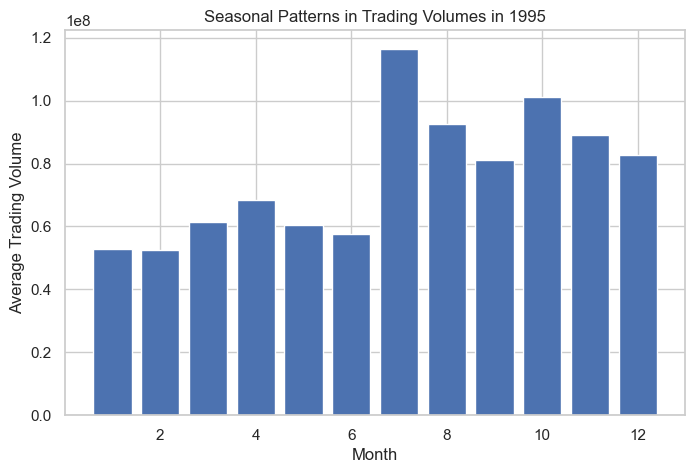

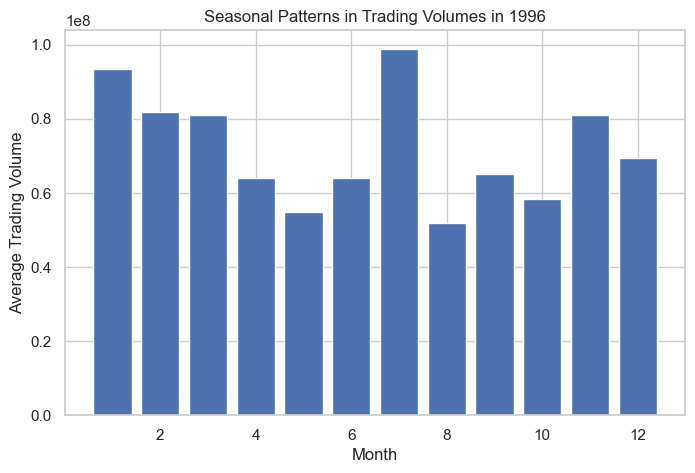

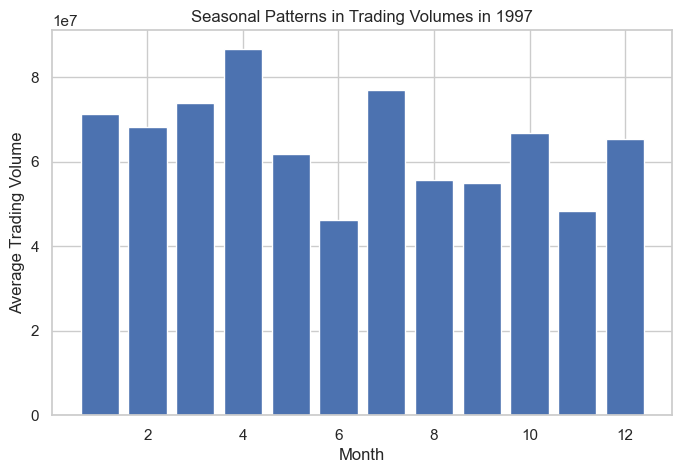

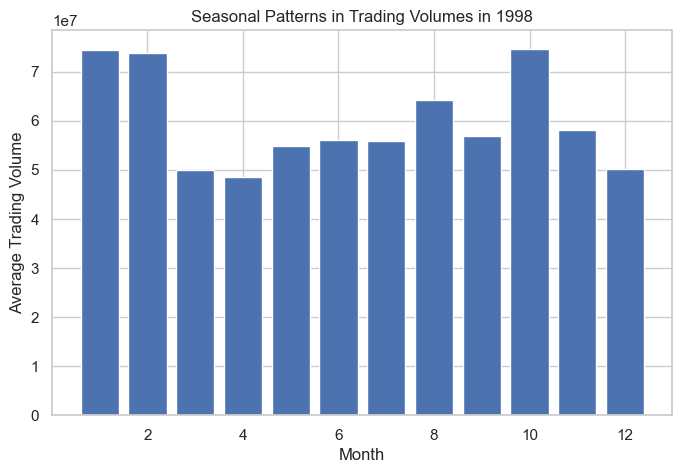

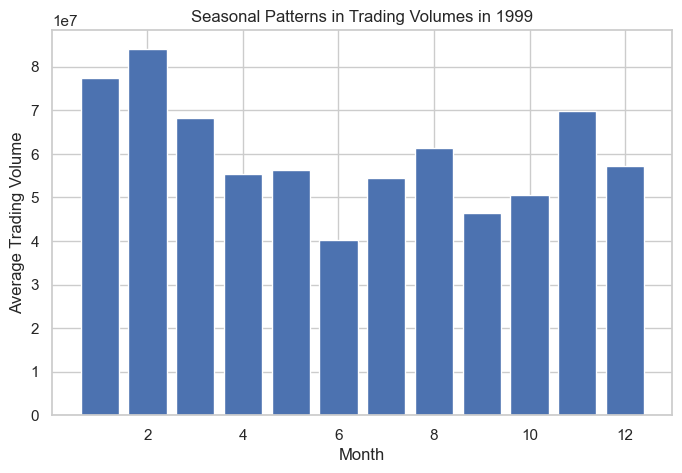

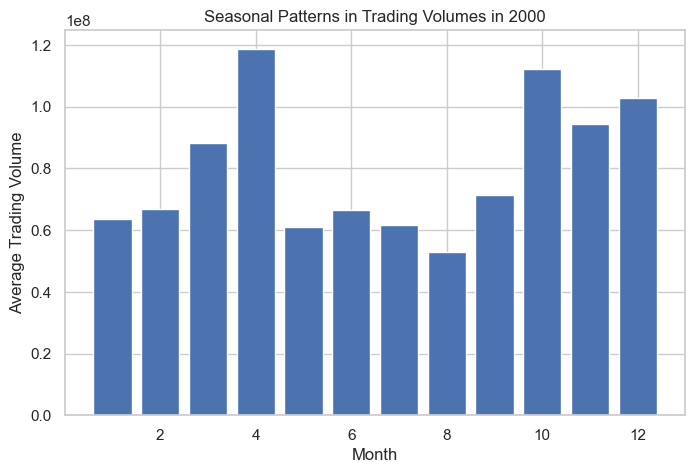

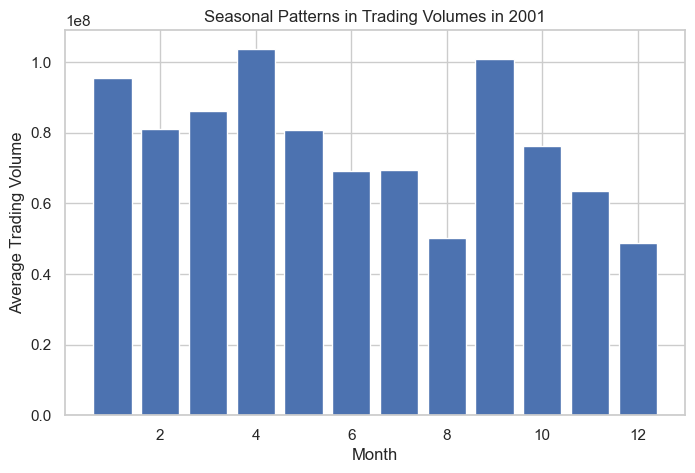

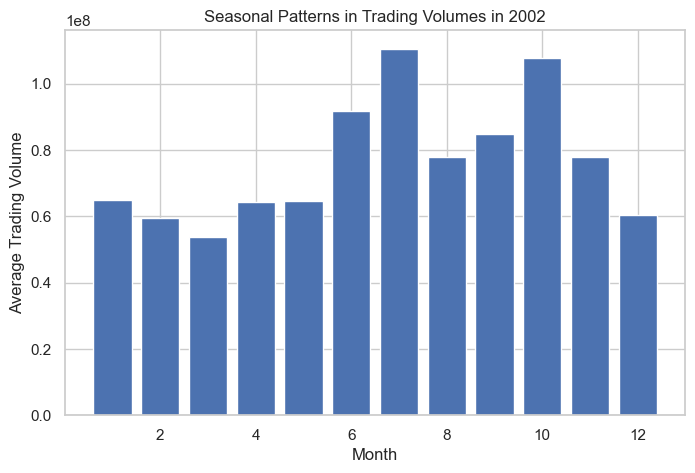

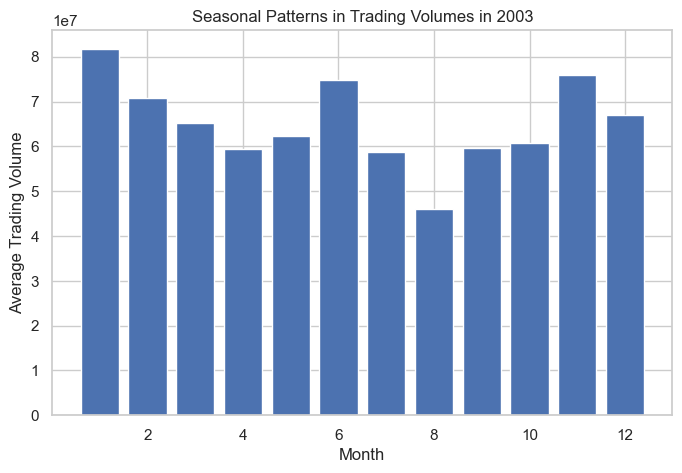

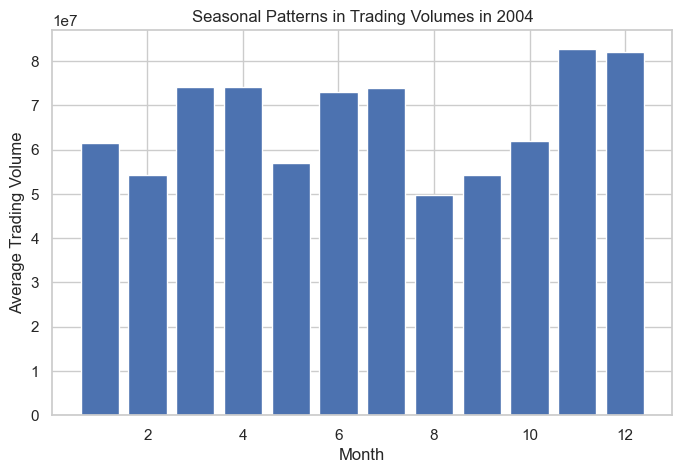

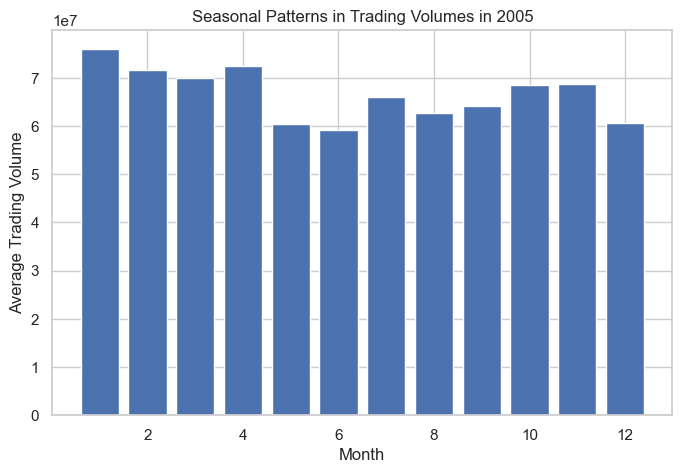

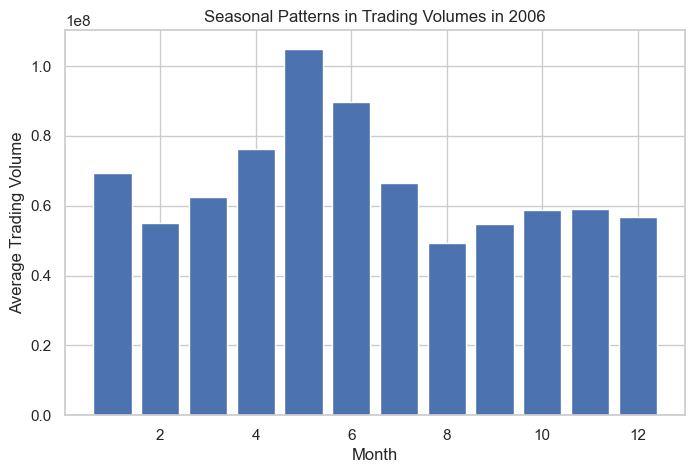

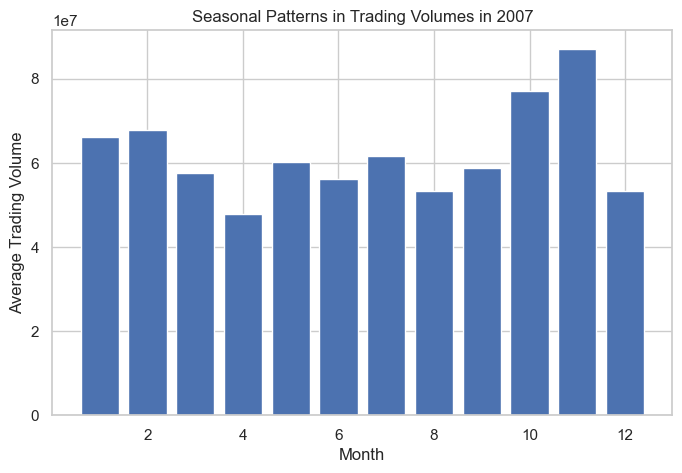

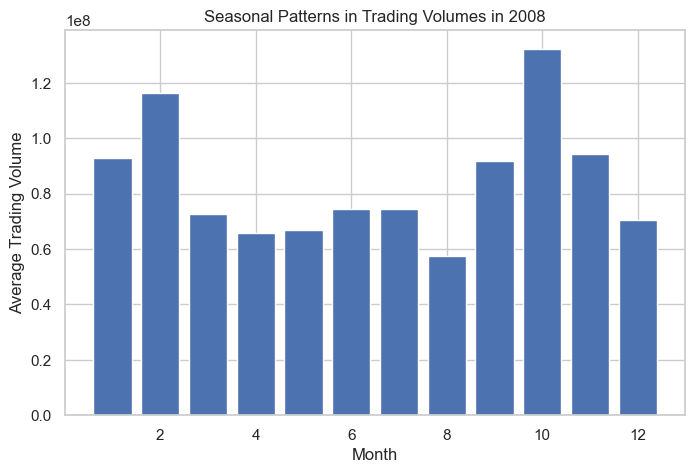

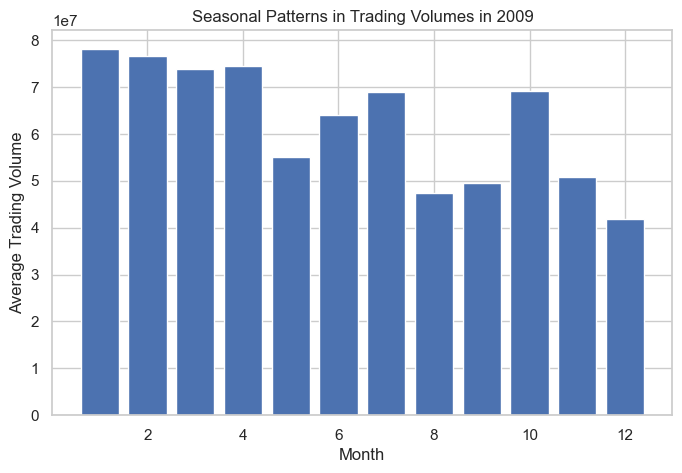

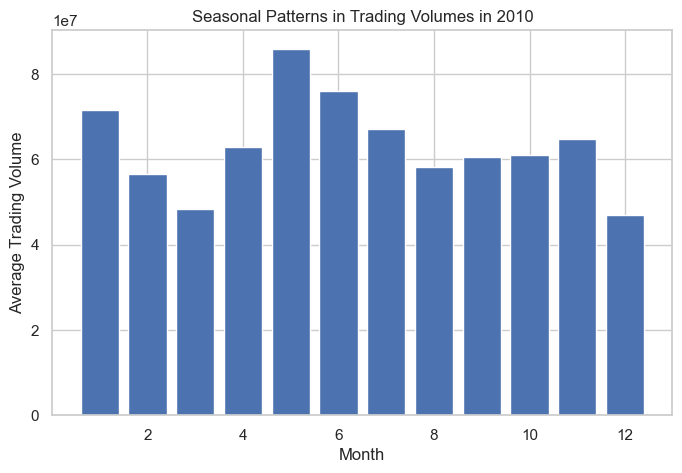

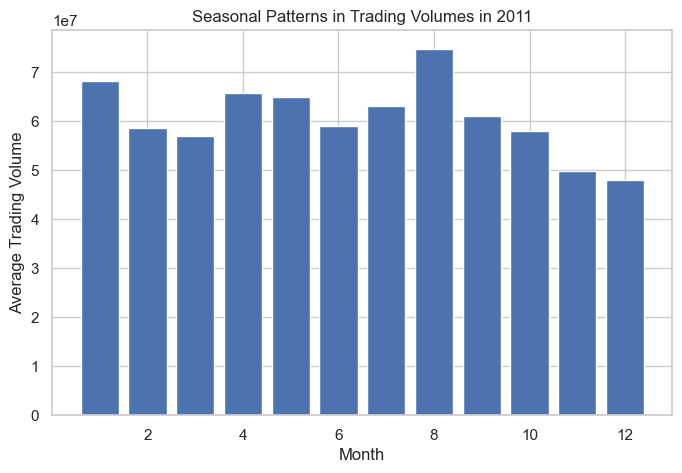

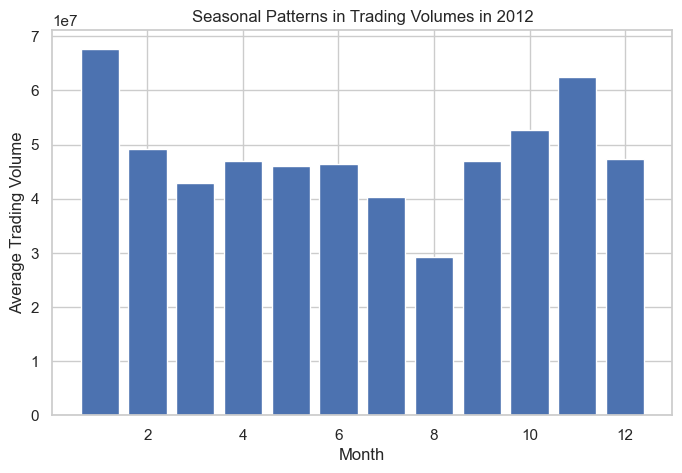

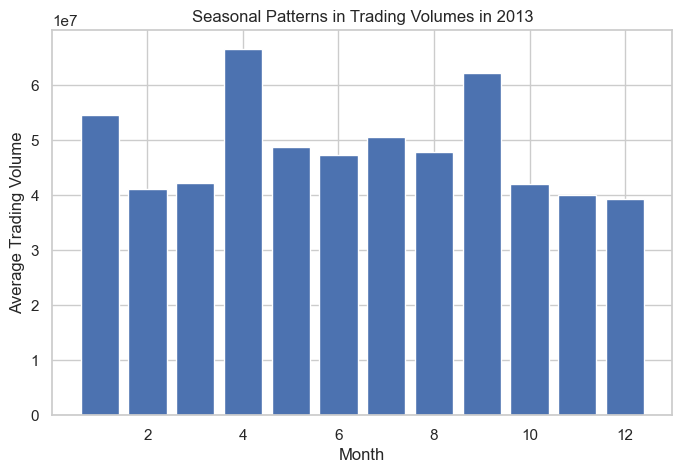

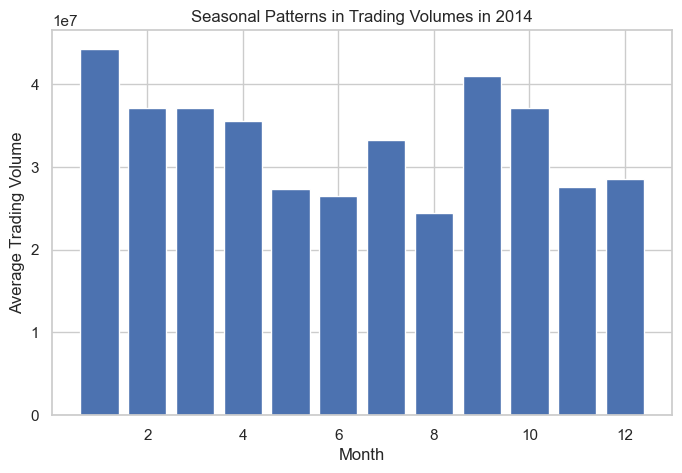

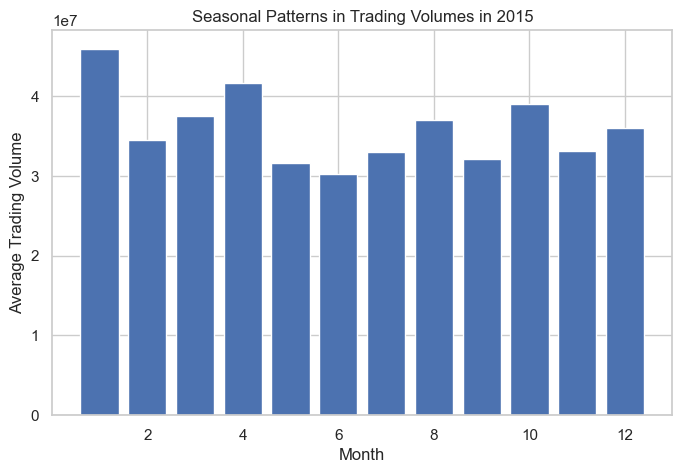

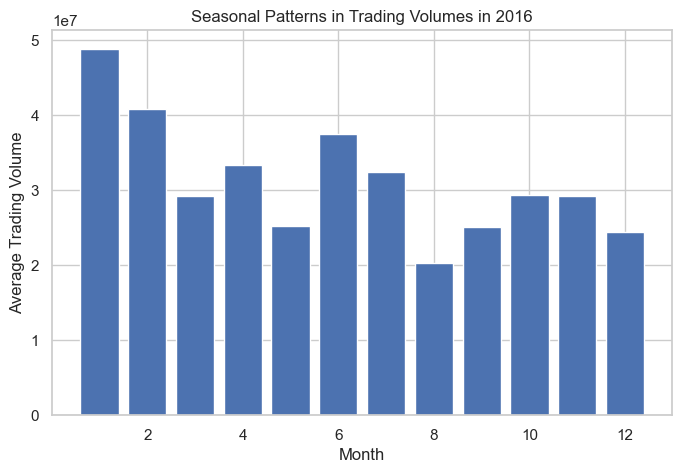

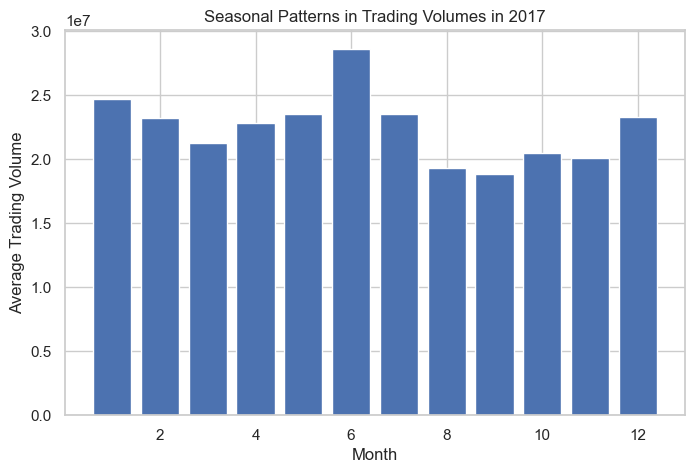

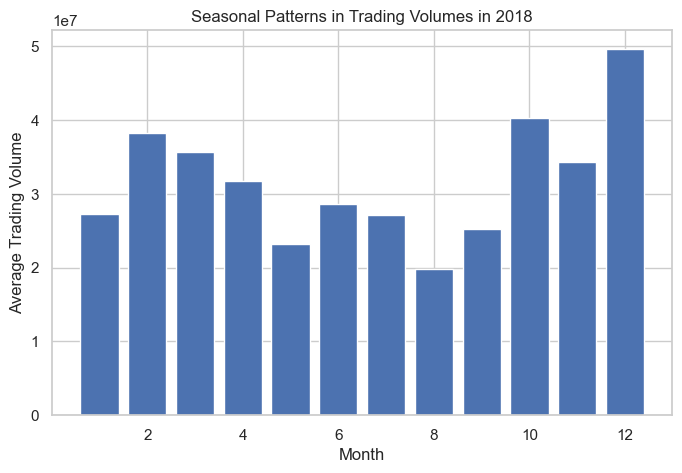

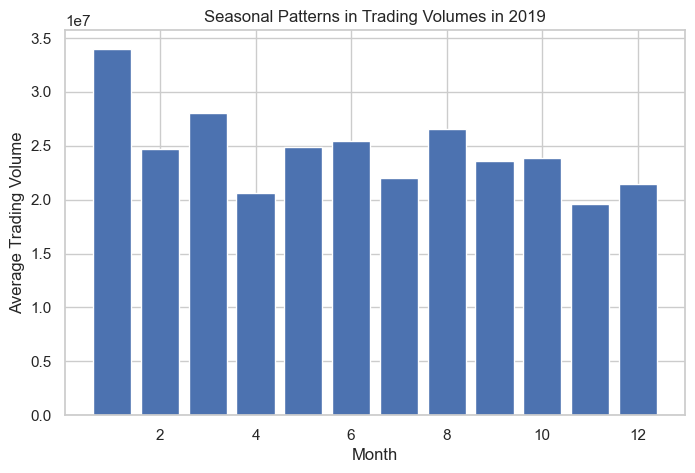

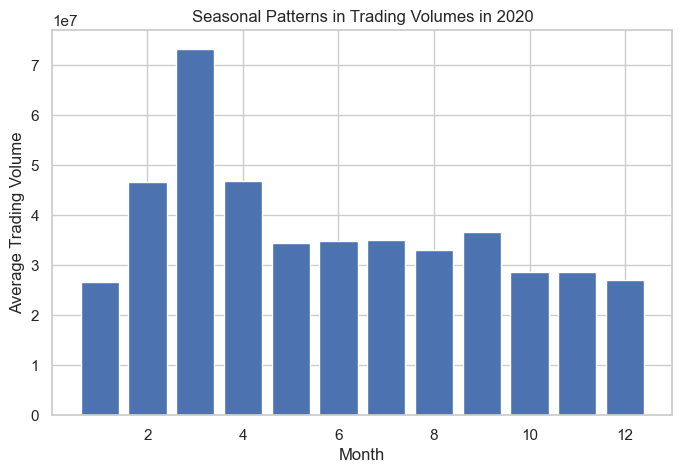

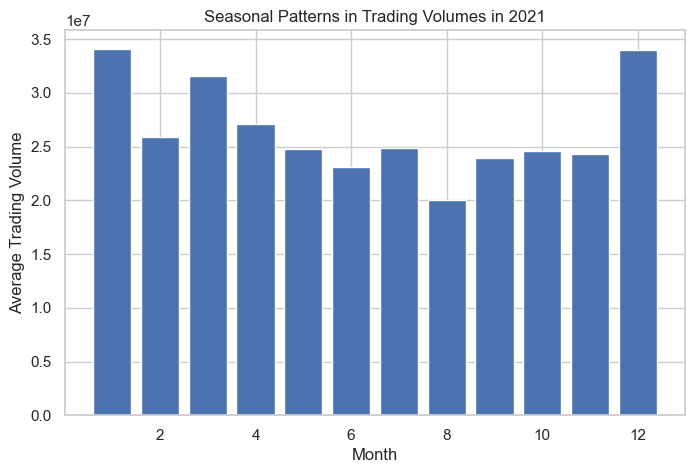

In [21]:


# Group by year and month, then calculate average trading volume
for year, group in df.groupby(df.index.year):
    monthly_avg_volume = group.groupby(group.index.month)['Volume'].mean()
    
    # Plot the seasonal pattern for each year
    plt.figure(figsize=(8, 5))
    plt.bar(monthly_avg_volume.index, monthly_avg_volume)
    plt.title(f'Seasonal Patterns in Trading Volumes in {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Trading Volume')
    plt.show()


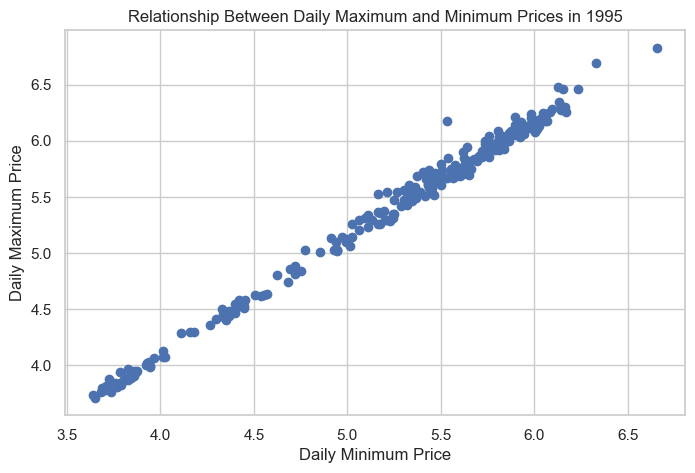

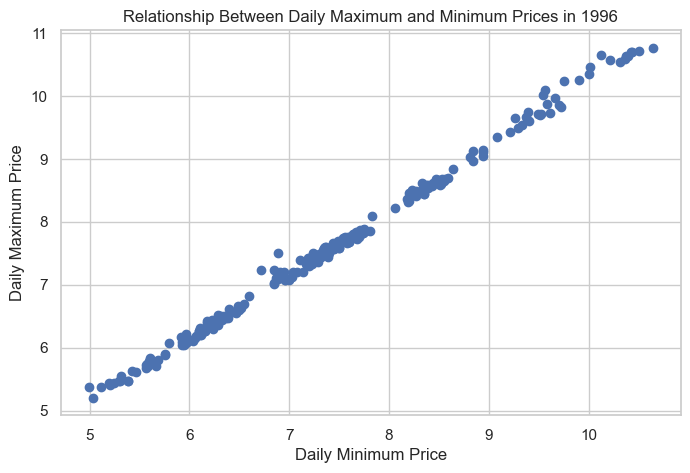

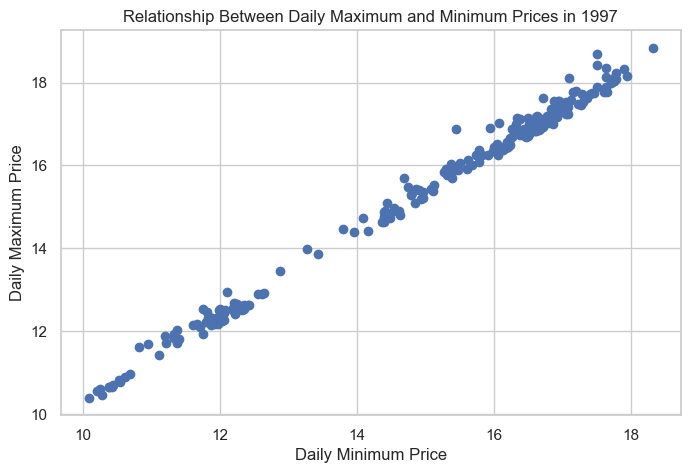

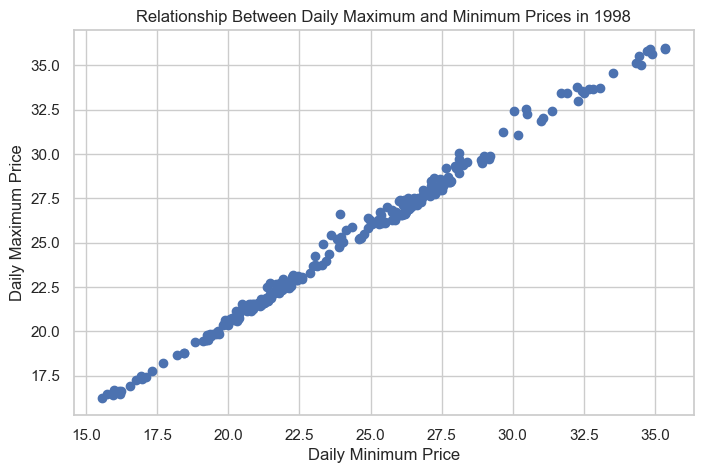

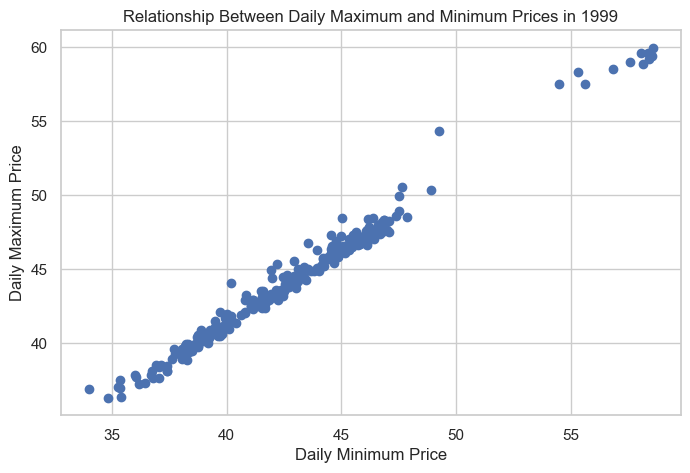

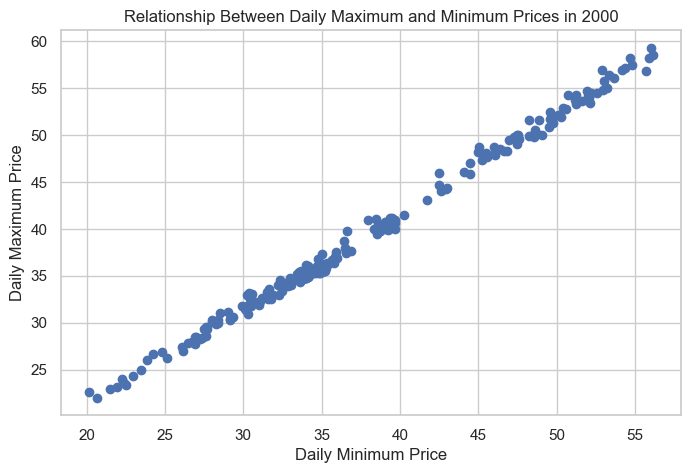

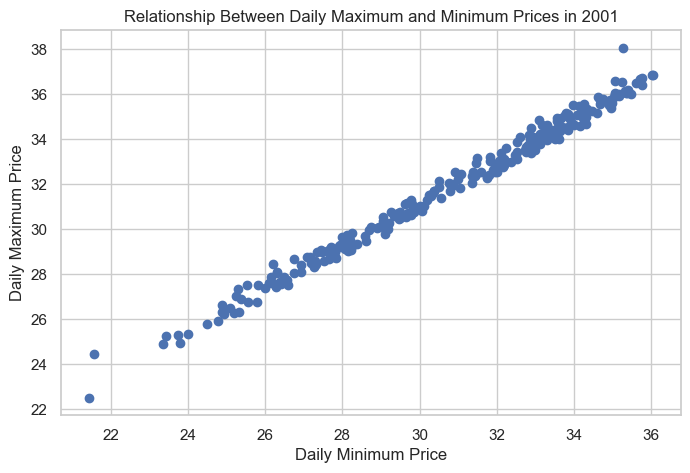

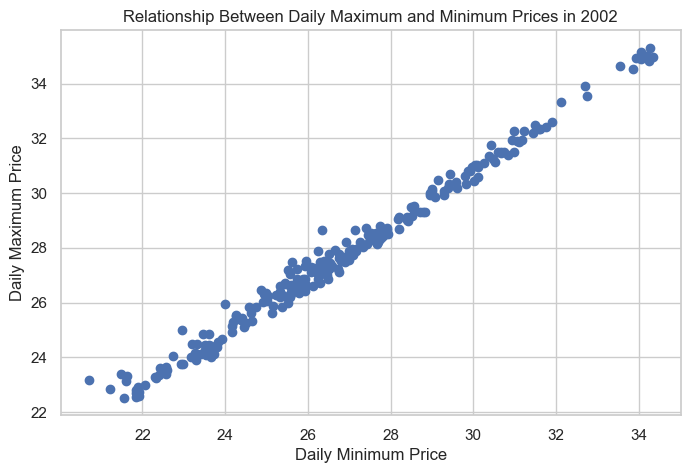

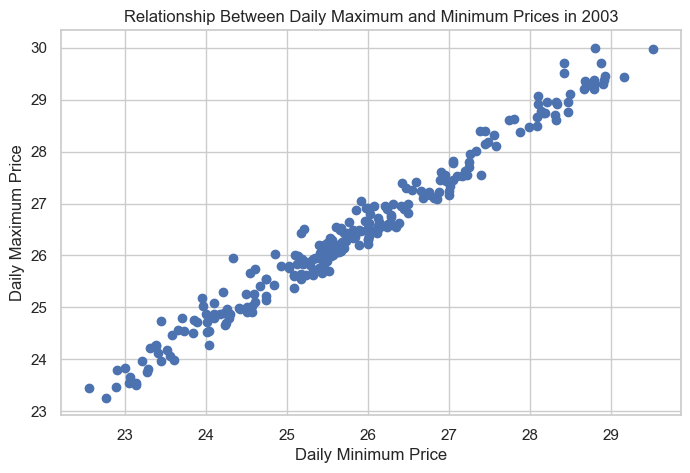

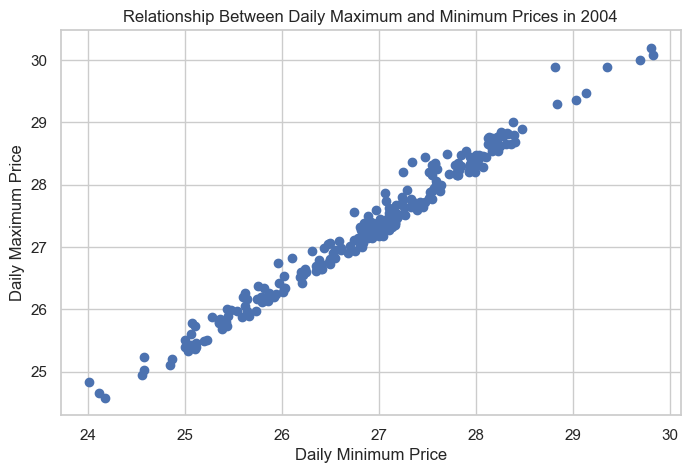

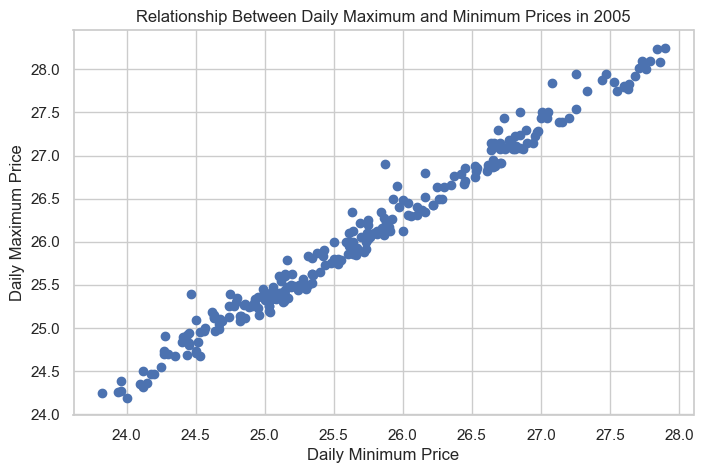

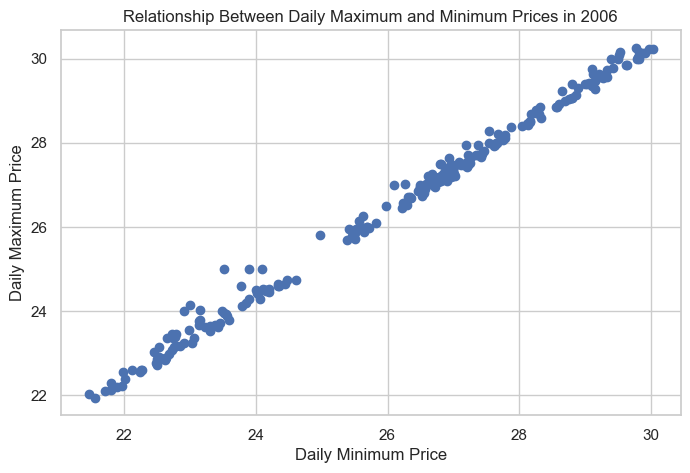

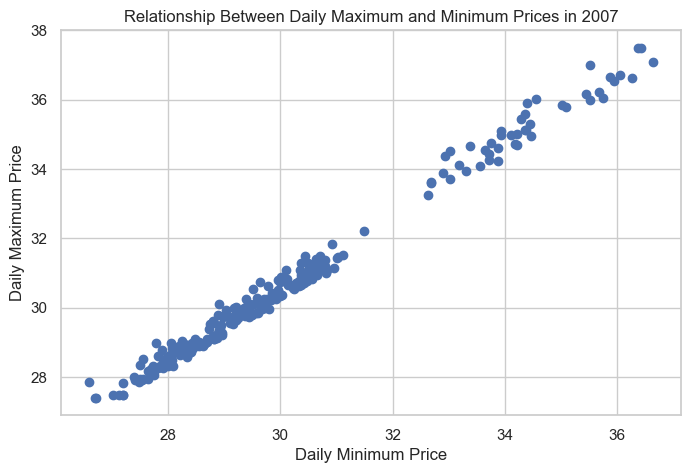

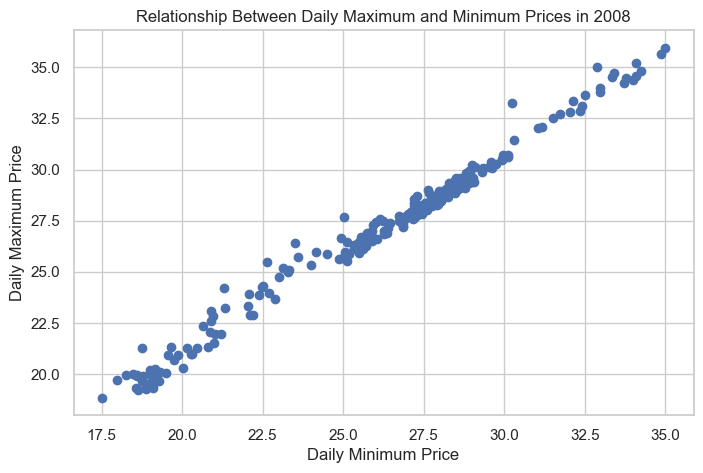

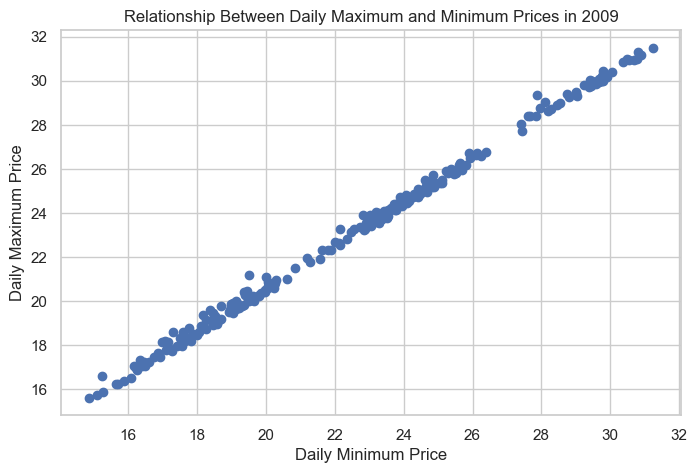

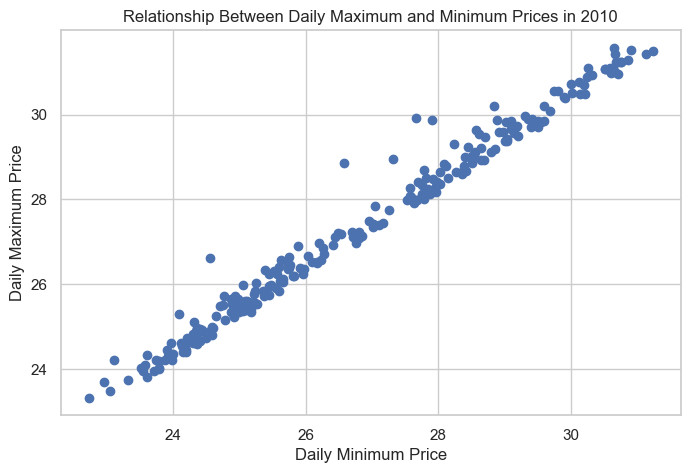

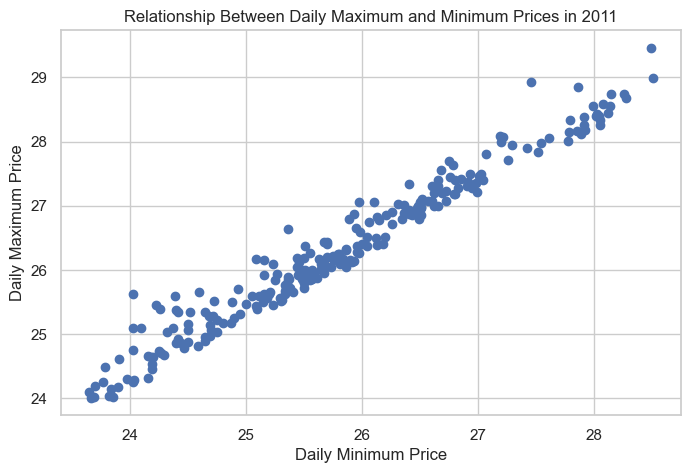

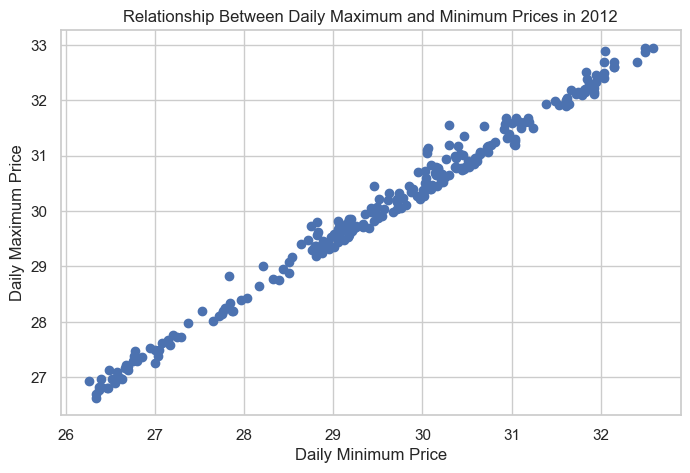

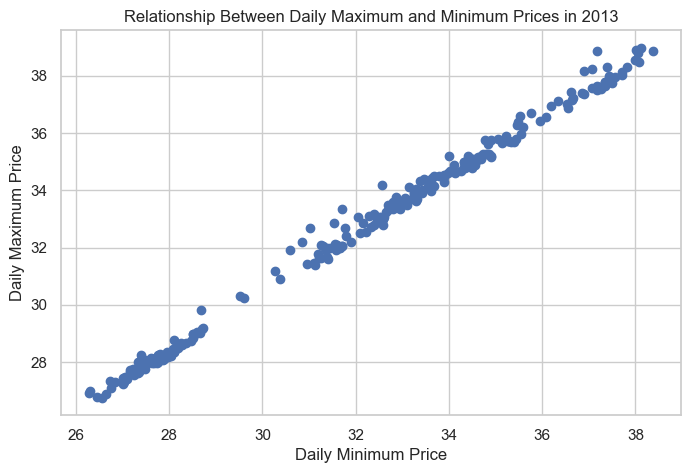

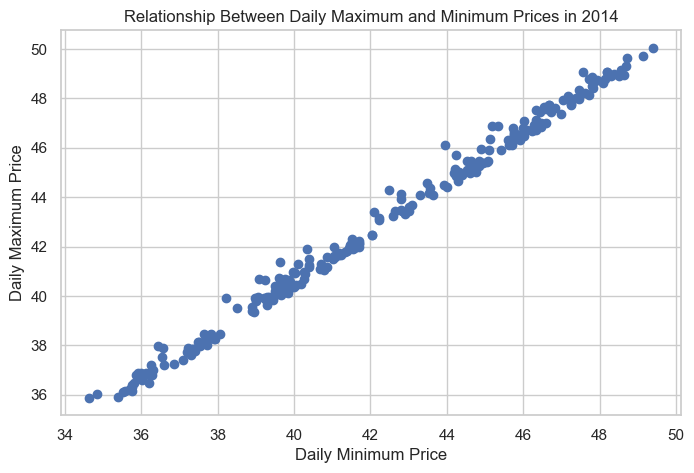

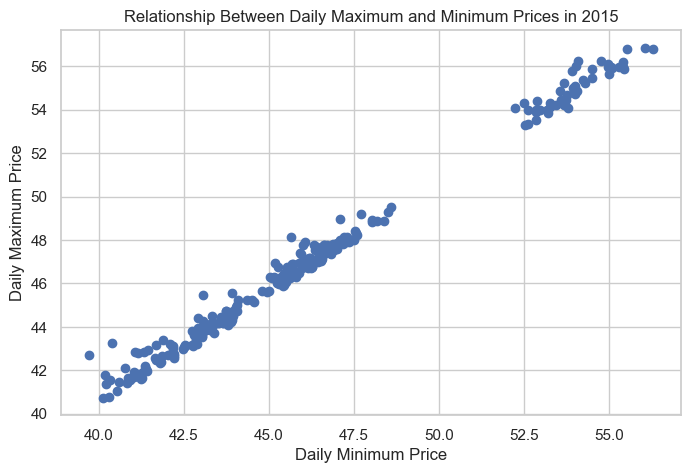

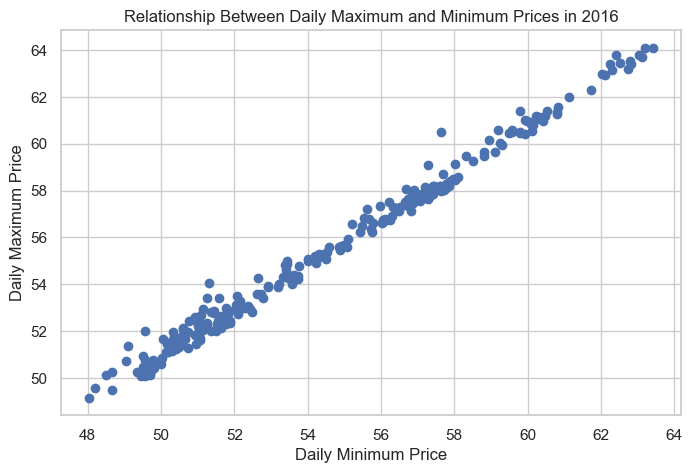

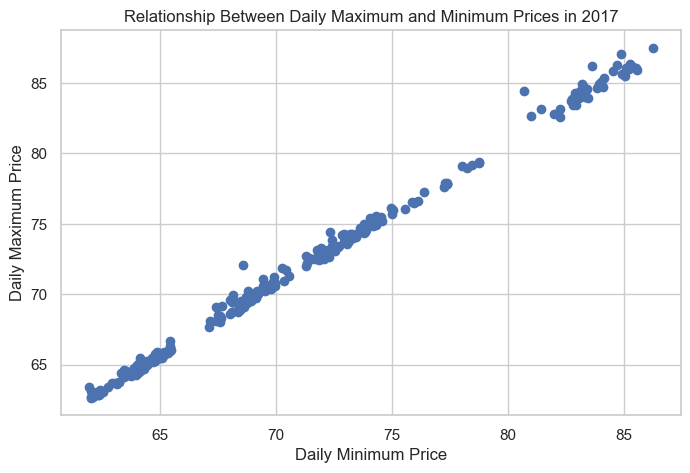

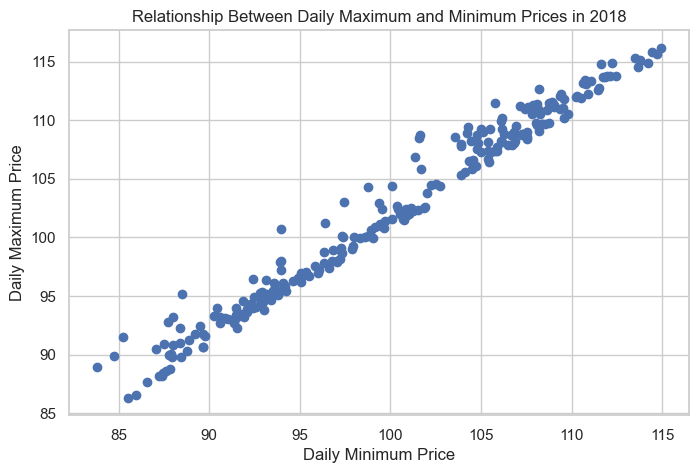

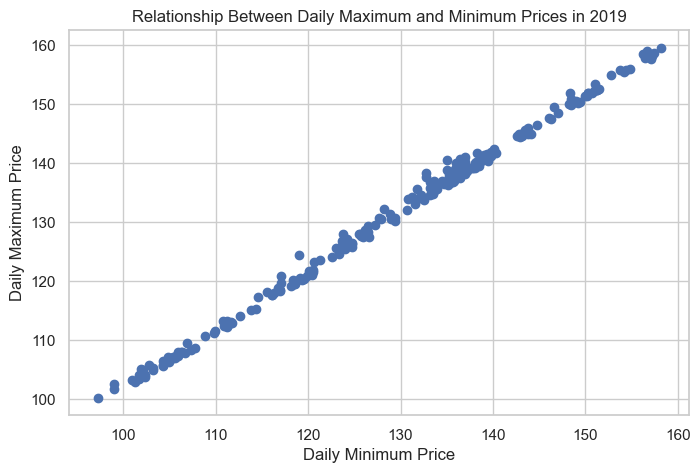

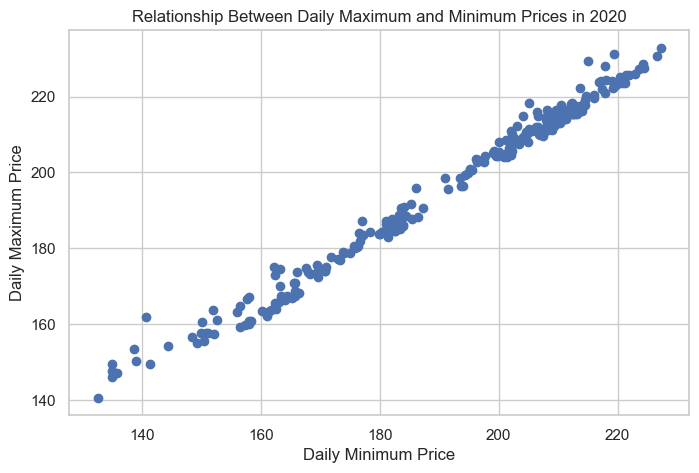

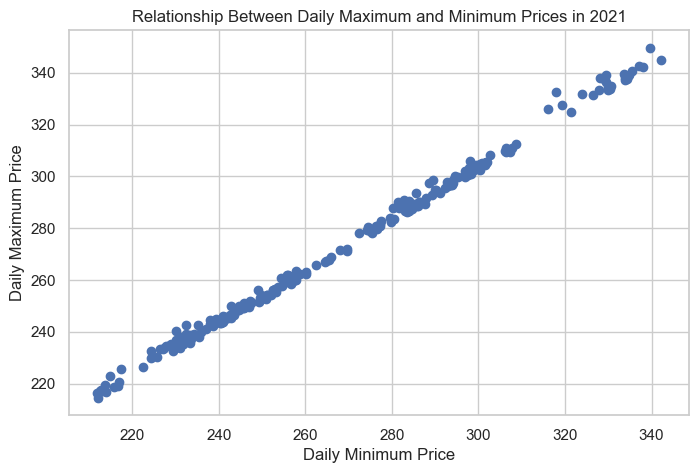

In [22]:


# Calculate the difference between daily maximum and minimum prices for each year
for year, group in df.groupby(df.index.year):
    group['Price Range'] = group['High'] - group['Low']
    
    # Plot the relationship for each year
    plt.figure(figsize=(8, 5))
    plt.scatter(group['Low'], group['High'])
    plt.title(f'Relationship Between Daily Maximum and Minimum Prices in {year}')
    plt.xlabel('Daily Minimum Price')
    plt.ylabel('Daily Maximum Price')
    plt.show()


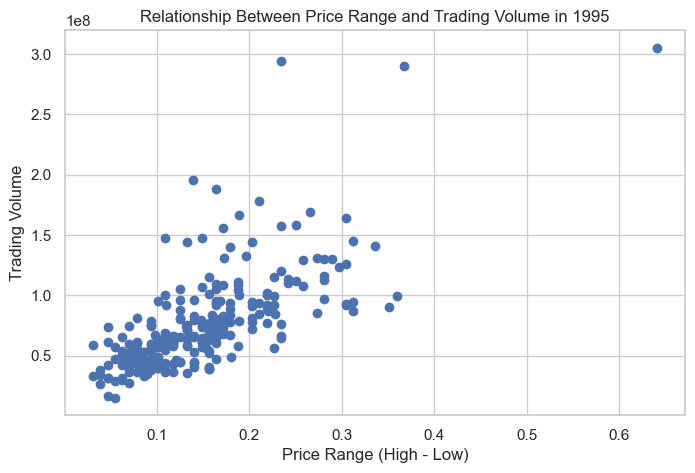

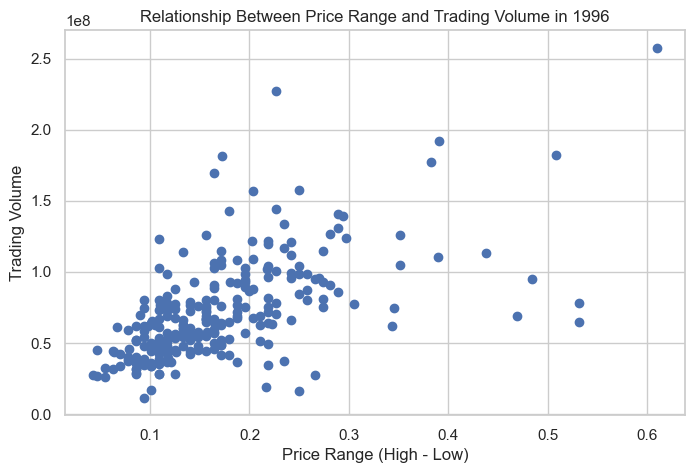

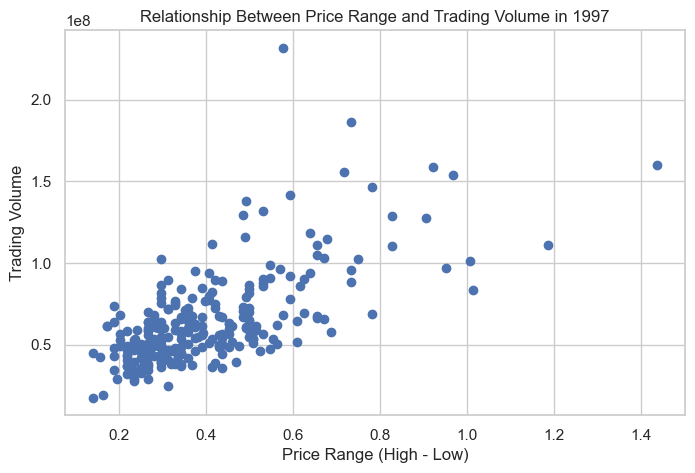

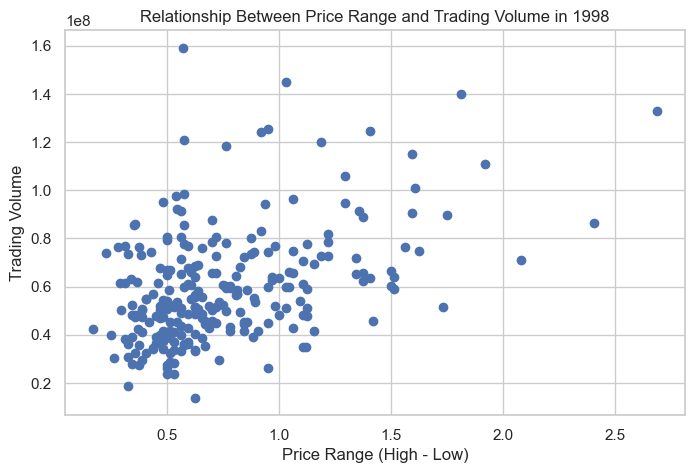

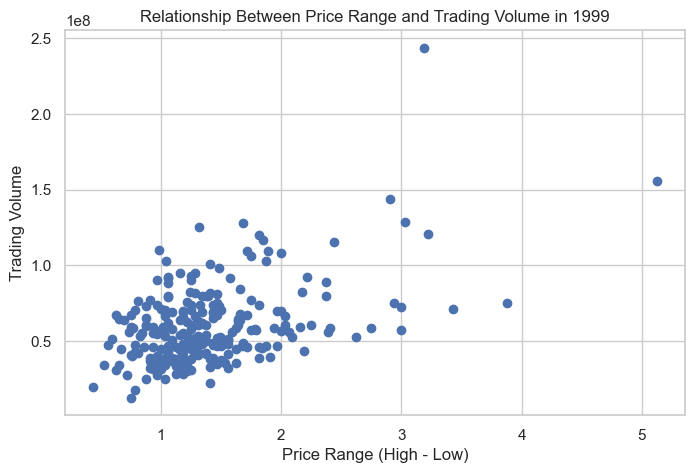

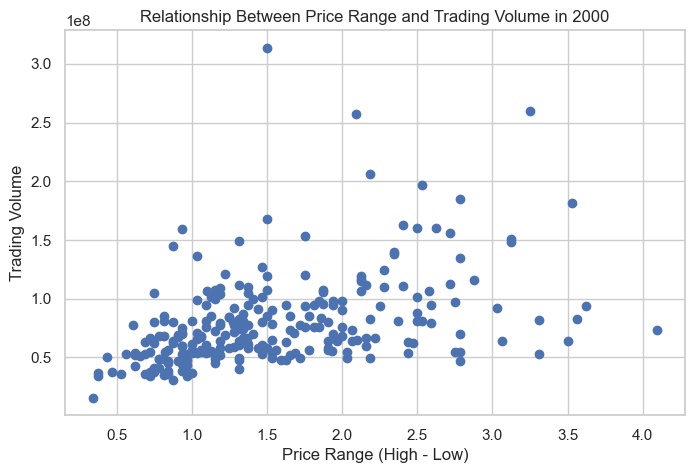

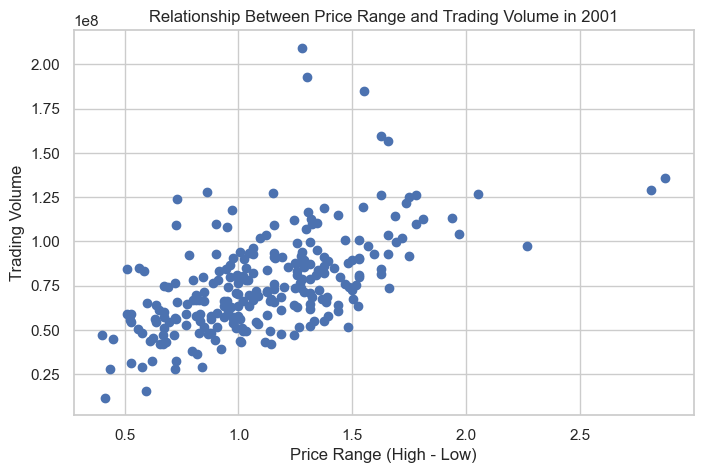

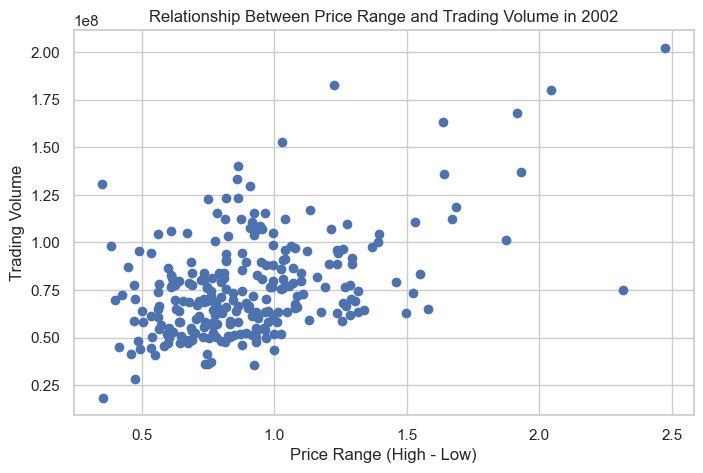

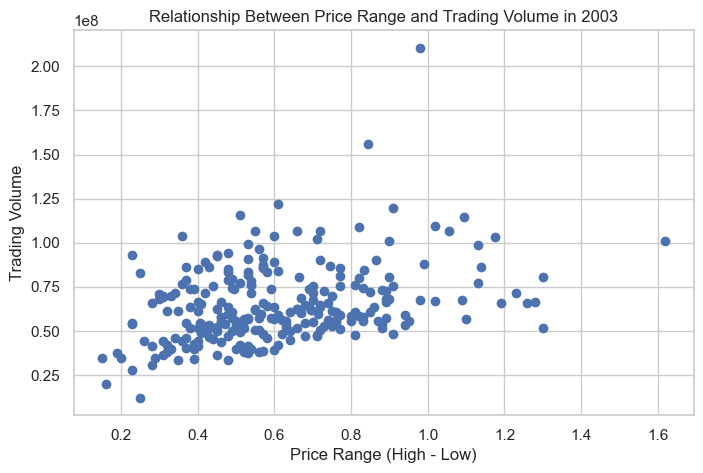

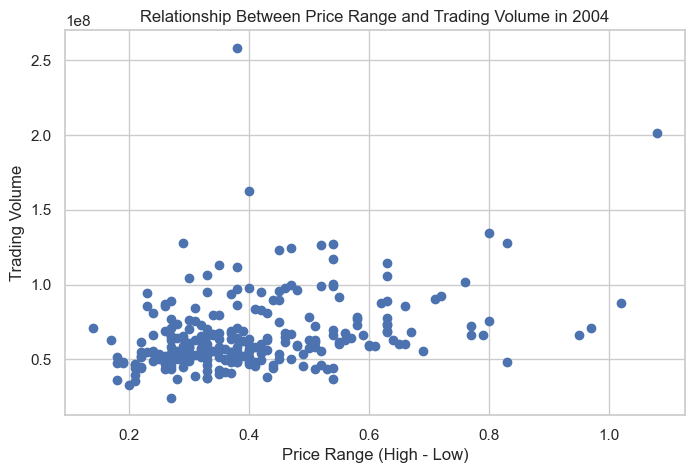

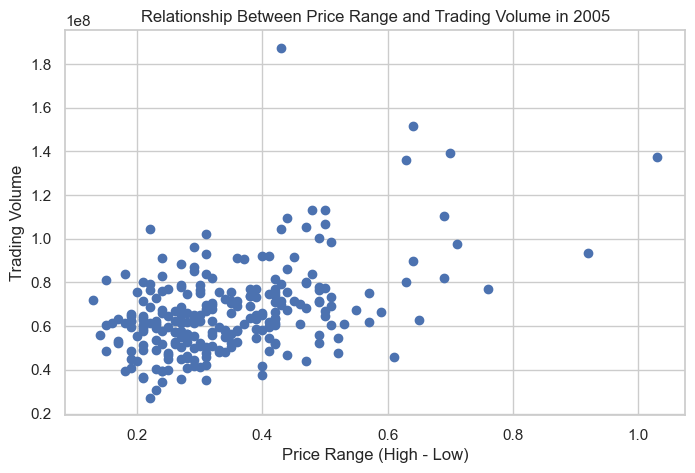

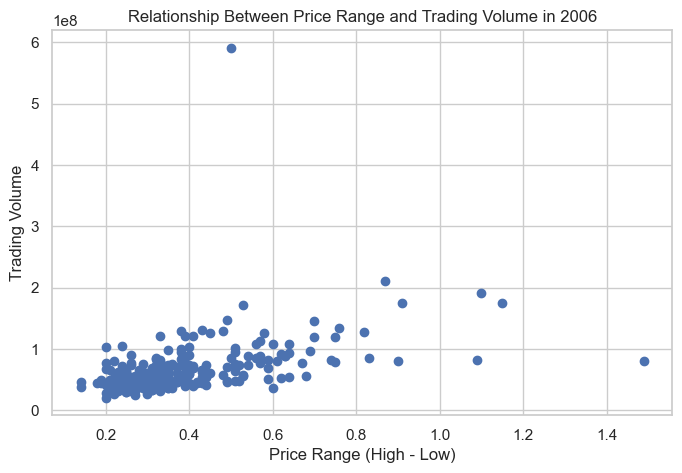

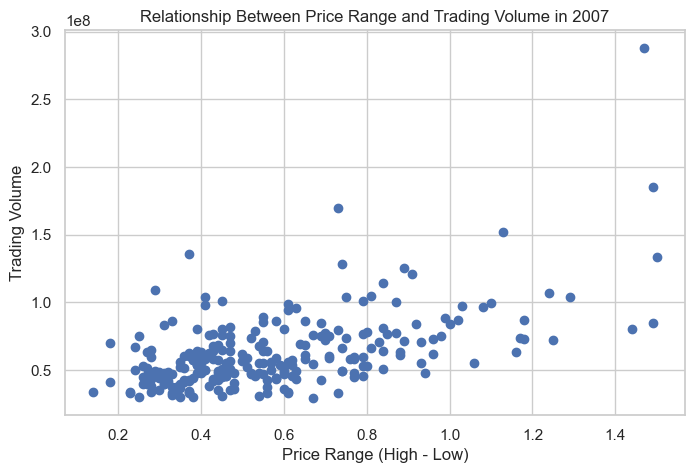

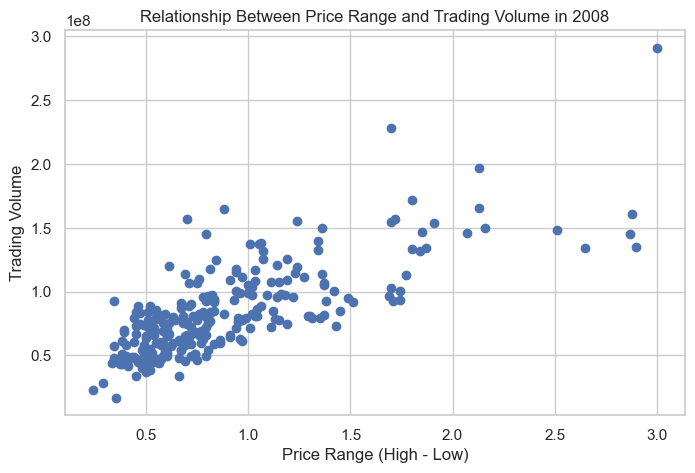

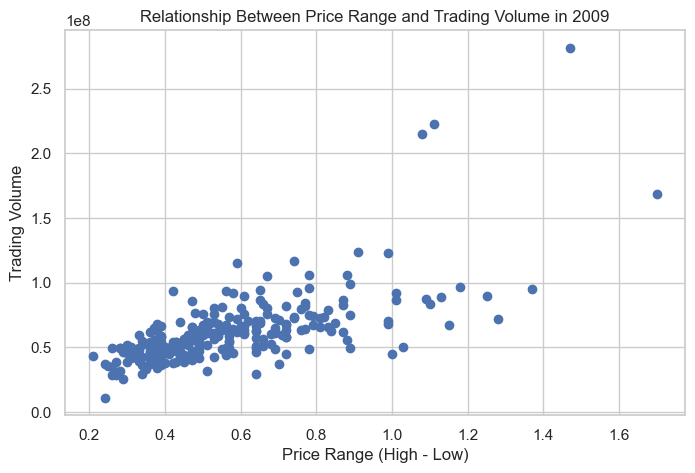

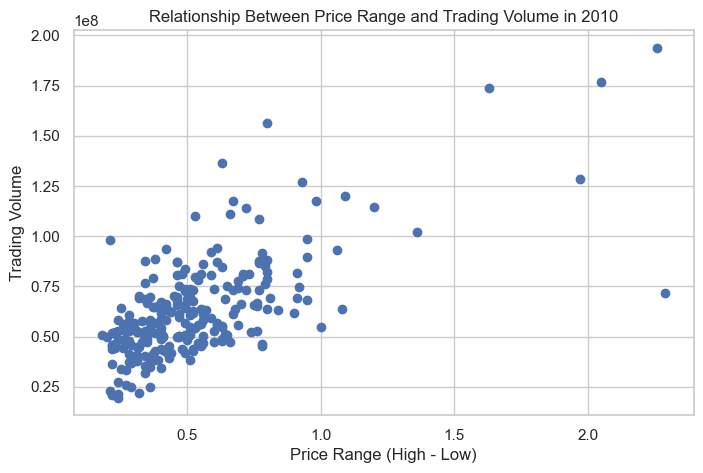

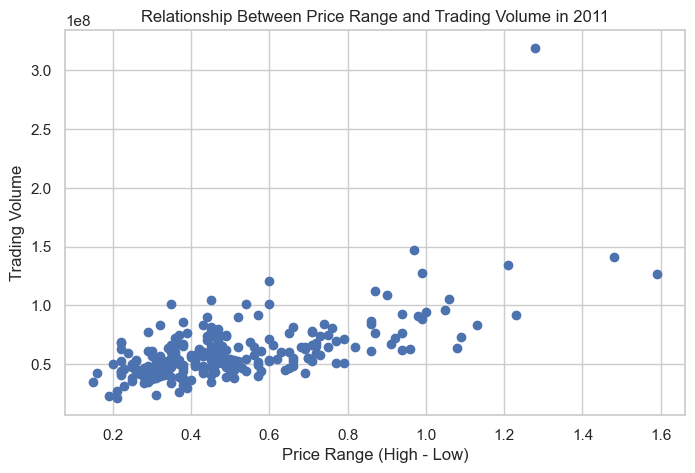

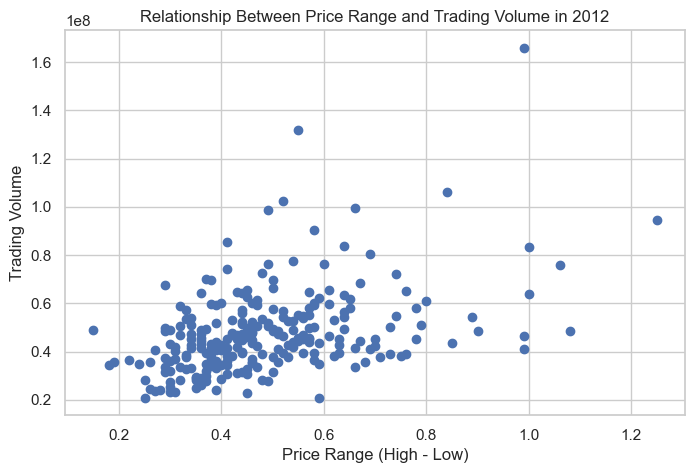

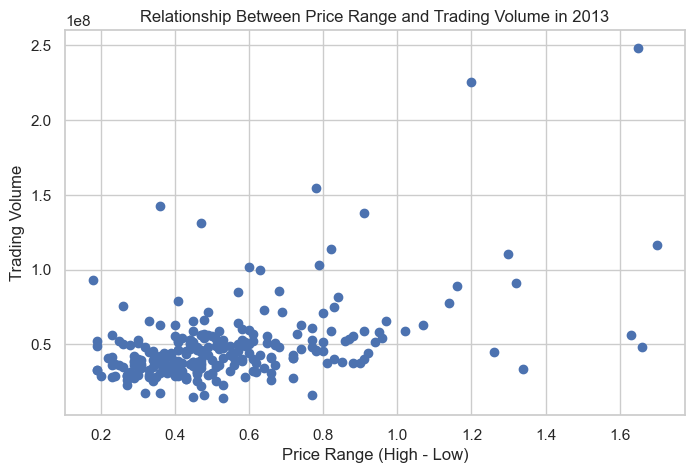

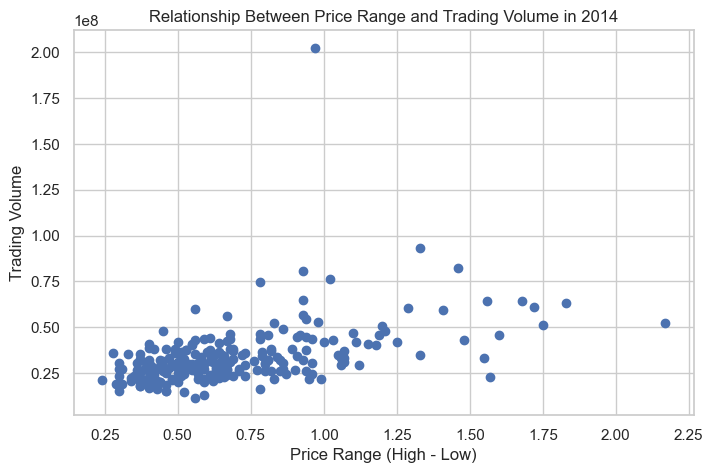

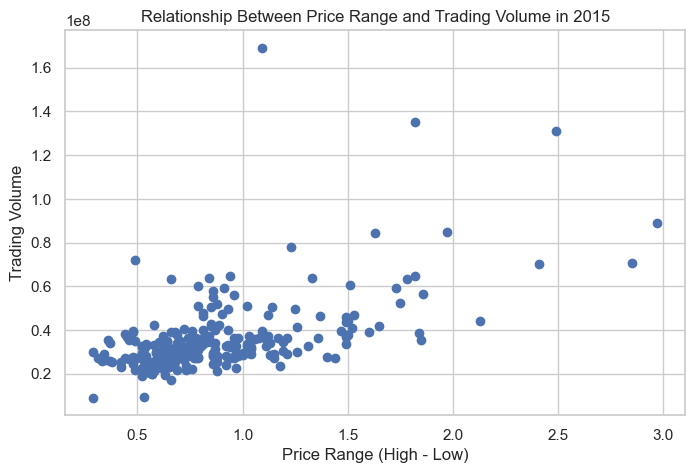

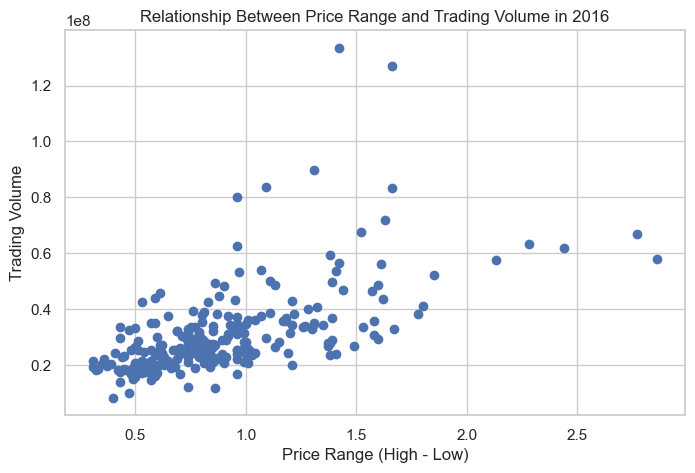

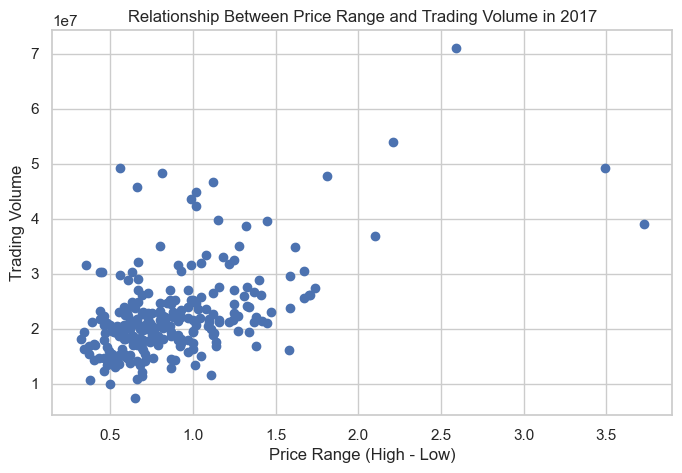

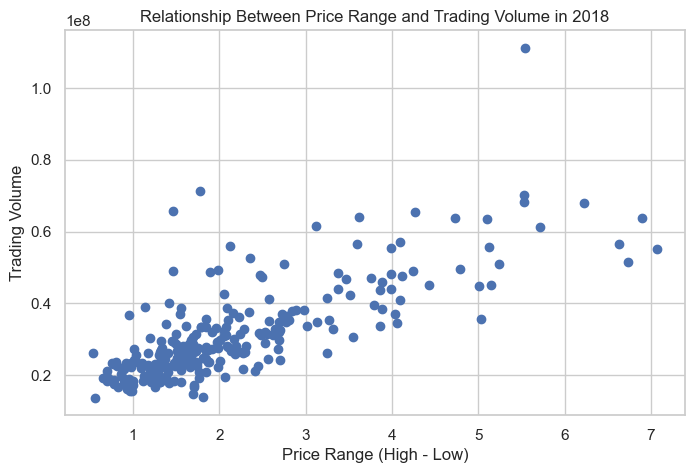

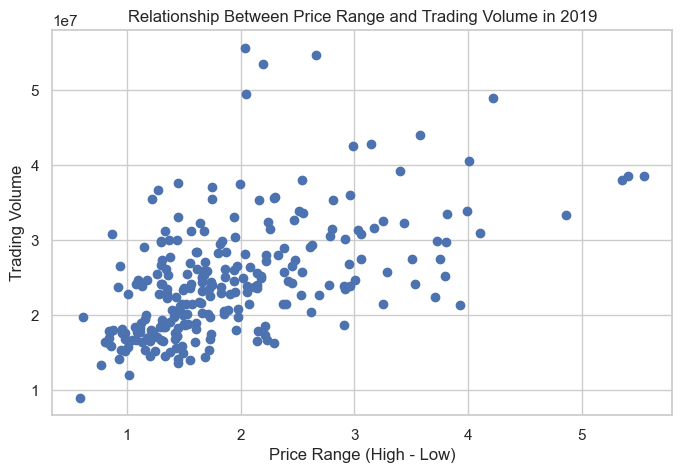

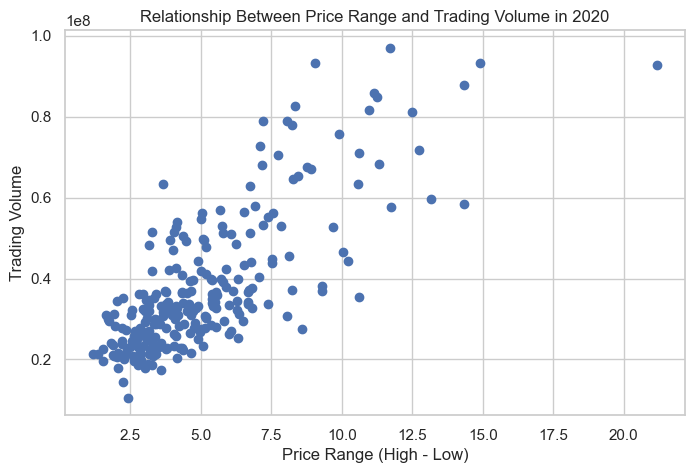

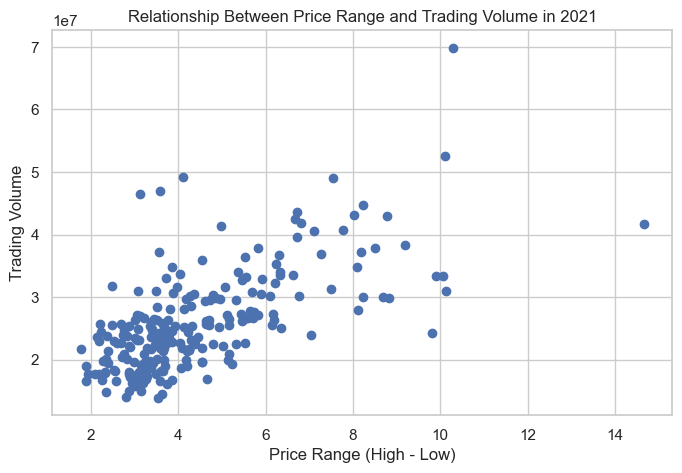

In [23]:


# Calculate the difference between daily maximum and minimum prices and trading volume for each year
for year, group in df.groupby(df.index.year):
    group['Price Range'] = group['High'] - group['Low']
    
    # Plot the relationship for each year
    plt.figure(figsize=(8, 5))
    plt.scatter(group['Price Range'], group['Volume'])
    plt.title(f'Relationship Between Price Range and Trading Volume in {year}')
    plt.xlabel('Price Range (High - Low)')
    plt.ylabel('Trading Volume')
    plt.show()


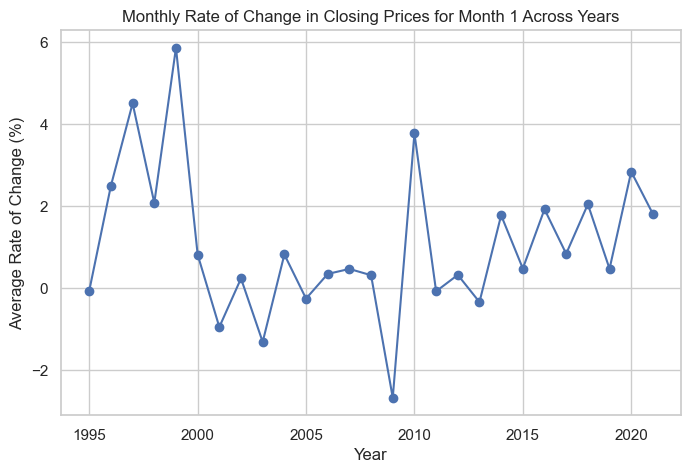

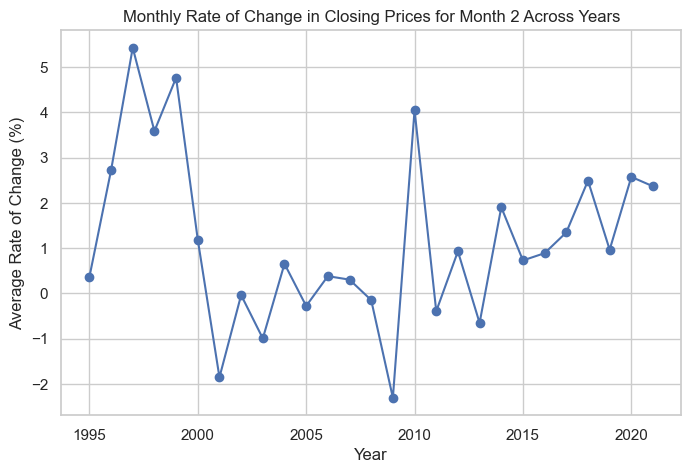

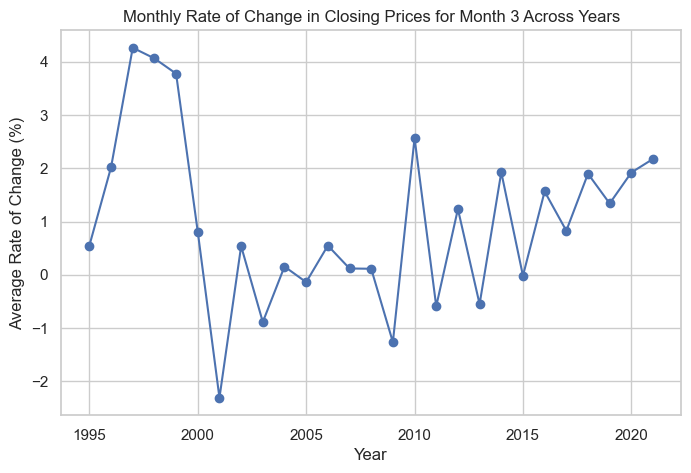

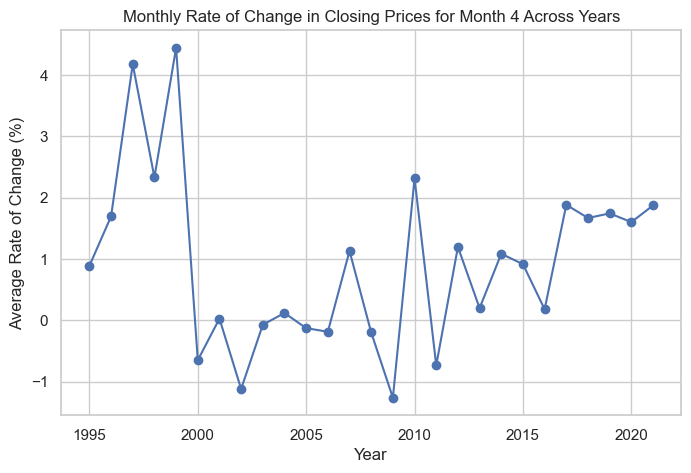

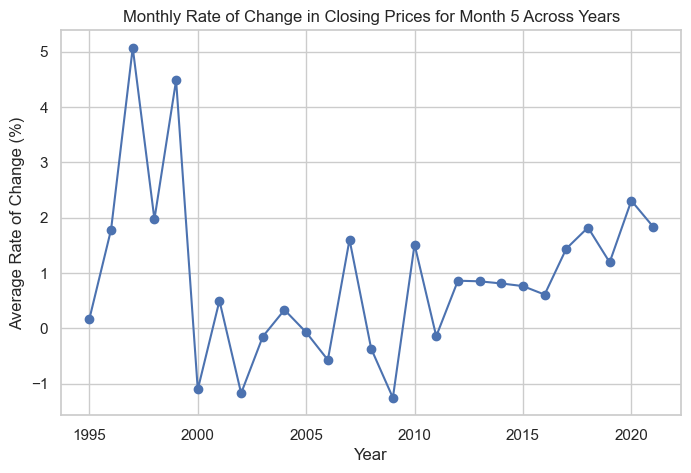

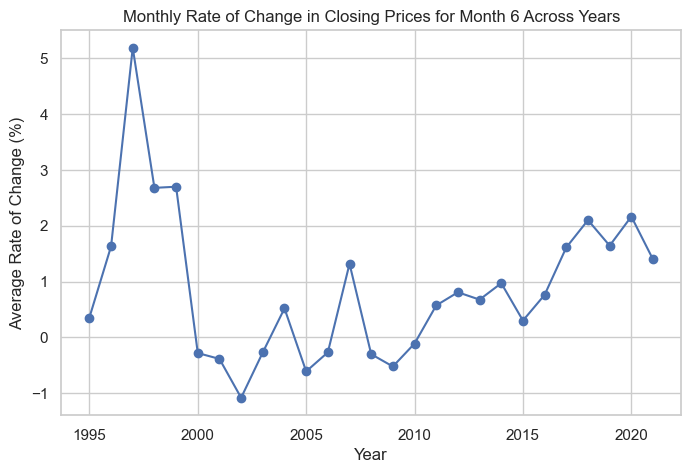

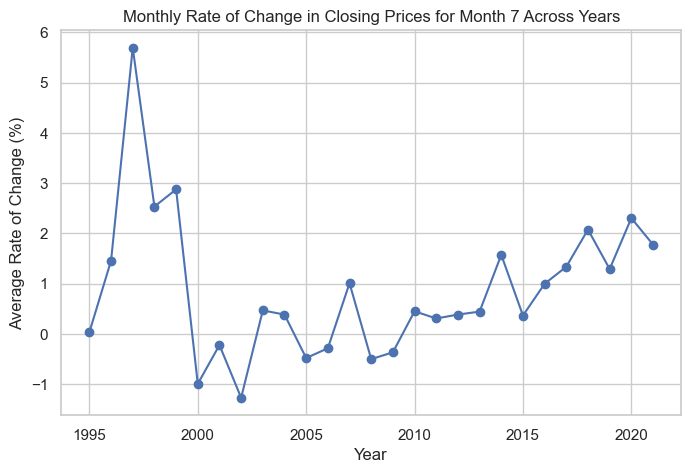

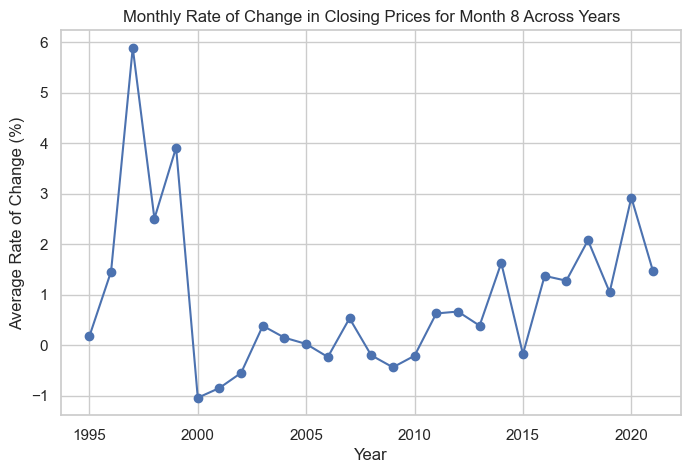

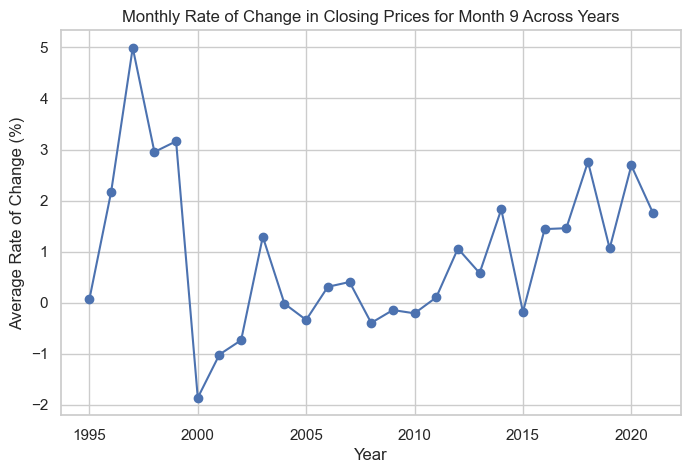

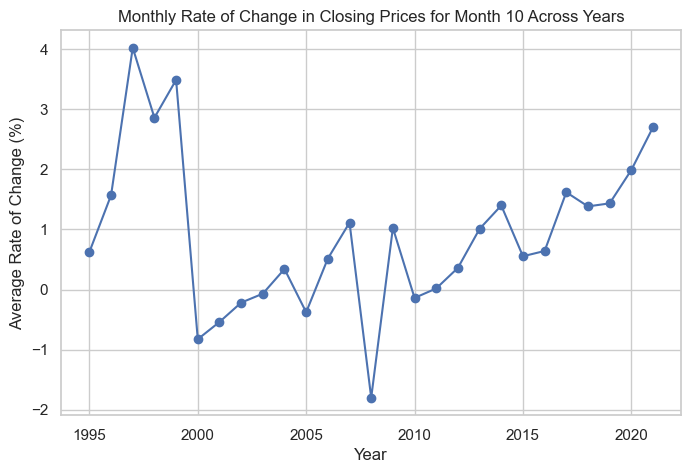

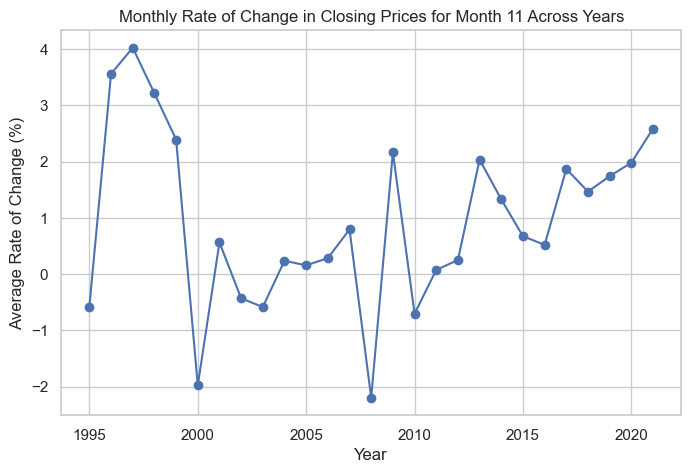

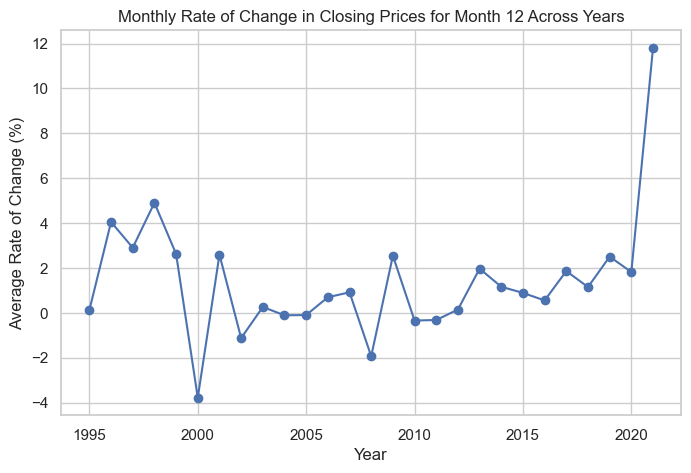

In [24]:
for month in range(1,13):
    target_month = month  # Replace with the desired month (1 for January, 2 for February, and so on)
    # Filter data for the chosen month
    df_target_month = df[df.index.month == target_month]
    # Calculate the rate of change in closing prices for the chosen month across years
    monthly_rate_change = df_target_month.pct_change().groupby(df_target_month.index.year)['Close'].mean() * 100

    # Plot the rate of change for the chosen month across years
    plt.figure(figsize=(8, 5))
    plt.plot(monthly_rate_change, marker='o', linestyle='-')
    plt.title(f'Monthly Rate of Change in Closing Prices for Month {target_month} Across Years')
    plt.xlabel('Year')
    plt.ylabel('Average Rate of Change (%)')
    plt.show()

In [ ]:
target_month = month  # Replace with the desired month (1 for January, 2 for February, and so on)
df_rate_month = pd.DataFrame()
# Filter data for the chosen month
df_target_month = df[df.index.month == target_month].mean()
# Calculate the rate of change in closing prices for the chosen month across years
monthly_rate_change = df_target_month.pct_change().groupby(df_target_month.index.year)['Close'].mean() * 100

# Plot the rate of change for the chosen month across years
plt.figure(figsize=(8, 5))
plt.plot(monthly_rate_change, marker='o', linestyle='-')
plt.title(f'Monthly Rate of Change in Closing Prices for Month {target_month} Across Years')
plt.xlabel('Year')
plt.ylabel('Average Rate of Change (%)')
plt.show()

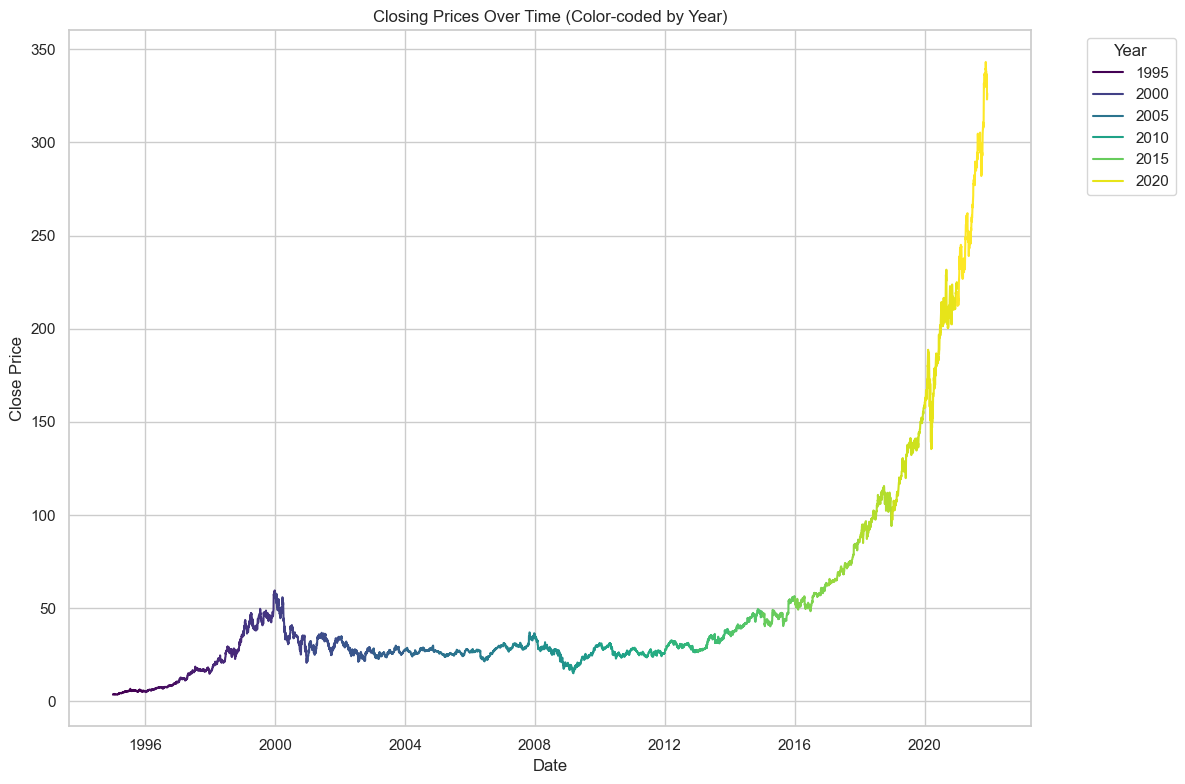

In [25]:

# Create subplots for each year using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the data using Seaborn's lineplot
sns.lineplot(data=df, x=df.index, y='Close', hue=df.index.year, palette='viridis')

plt.title('Closing Prices Over Time (Color-coded by Year)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [26]:

# Calculate daily price change
df['Price Change'] = df['Close'].diff()

# Identify whether the stock went up, down, or stayed the same each day
df['Direction'] = np.where(df['Price Change'] > 0, 'Up', np.where(df['Price Change'] < 0, 'Down', 'No Change'))

# Calculate the number of continuous days the stock went up or down
up_days = df.groupby((df['Direction'] != df['Direction'].shift()).cumsum())['Direction'].apply(lambda x: (x == 'Up').all()).sum()
down_days = df.groupby((df['Direction'] != df['Direction'].shift()).cumsum())['Direction'].apply(lambda x: (x == 'Down').all()).sum()

print(f"Number of continuous up days: {up_days}")
print(f"Number of continuous down days: {down_days}")

# Calculate the maximum drawdown
df['Cumulative Return'] = (1 + df['Price Change'] / df['Close'].shift()).cumprod()
df['Drawdown'] = 1 - df['Cumulative Return'] / df['Cumulative Return'].cummax()

max_drawdown = df['Drawdown'].max()
print(f"Maximum drawdown: {max_drawdown * 100:.2f}%")


Number of continuous up days: 1771
Number of continuous down days: 1766
Maximum drawdown: 74.56%
